In [7]:
import uproot
# import ROOT
import matplotlib.pyplot as plt

In [2]:
%%bash 
combine -M MultiDimFit -d combine_test_datacard_long.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL -n Envelope -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 --verbose 2 &> outputV1.log

In [4]:
%%bash 
combine -M MultiDimFit -d combine_test_datacard_long.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index --setParameters pdf_index=0 -n fixed_pdf_0 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1
combine -M MultiDimFit -d combine_test_datacard_long.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index --setParameters pdf_index=1 -n fixed_pdf_1 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1
combine -M MultiDimFit -d combine_test_datacard_long.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index --setParameters pdf_index=2 -n fixed_pdf_2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1


 <<< Combine >>> 
 <<< v10.0.1 >>>
>>> Random number generator seed is 123456
>>> Method used is MultiDimFit
Set Range of Parameter r To : (-10,10)
Set Default Index of Parameter pdf_index To : 0 (was: 0 )
Doing initial fit: 
 POI: r= 2.03829 -> [-10,10]
Point 0/50 r = -9.8
Point 1/50 r = -9.4
Point 2/50 r = -9
Point 3/50 r = -8.6
Point 4/50 r = -8.2
Point 5/50 r = -7.8
Point 6/50 r = -7.4
Point 7/50 r = -7
Point 8/50 r = -6.6
Point 9/50 r = -6.2
Point 10/50 r = -5.8
Point 11/50 r = -5.4
Point 12/50 r = -5
Point 13/50 r = -4.6
Point 14/50 r = -4.2
Point 15/50 r = -3.8
Point 16/50 r = -3.4
Point 17/50 r = -3
Point 18/50 r = -2.6
Point 19/50 r = -2.2
Point 20/50 r = -1.8
Point 21/50 r = -1.4
Point 22/50 r = -1
Point 23/50 r = -0.6
Point 24/50 r = -0.2
Point 25/50 r = 0.2
Point 26/50 r = 0.6
Point 27/50 r = 1
Point 28/50 r = 1.4
Point 29/50 r = 1.8
Point 30/50 r = 2.2
Point 31/50 r = 2.6
Point 32/50 r = 3
Point 33/50 r = 3.4
Point 34/50 r = 3.8
Point 35/50 r = 4.2
Point 36/50 r = 4.6
Poin

In [5]:
def getRandNLL(load_path: str):
    file = uproot.open(load_path)
    nll = file['limit']['nll'].array()
    nll0 = file['limit']['nll0'].array()
    deltaNLL = file['limit']['deltaNLL'].array()
    y_arr = 2*(deltaNLL + nll0 + nll)[1:]
    # y_arr = 2*(deltaNLL)[1:]
    x_arr = file['limit']['r'].array()[1:]
    # print(f"file['limit']['r']: {file['limit']['r'].array()}")
    return x_arr, y_arr

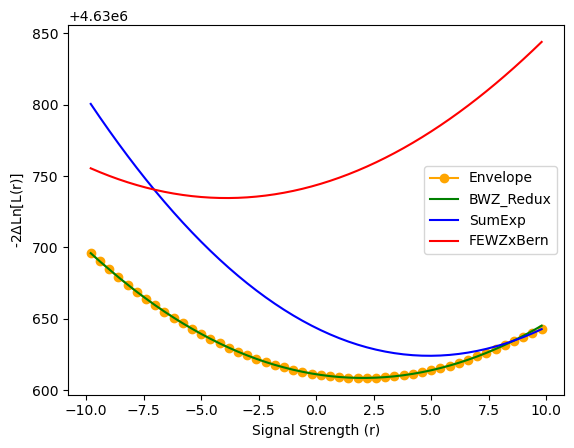

In [8]:
load_path_dict = {
    "Envelope": "./higgsCombineEnvelope.MultiDimFit.mH125.root",
    "BWZ_Redux": "./higgsCombinefixed_pdf_0.MultiDimFit.mH125.root",
    "SumExp": "./higgsCombinefixed_pdf_1.MultiDimFit.mH125.root",
    "FEWZxBern": "./higgsCombinefixed_pdf_2.MultiDimFit.mH125.root",
    # "PowerLaw": "./higgsCombinefixed_pdf_2.MultiDimFit.mH125.root",
    # "BWZxBern": "./higgsCombinefixed_pdf_3.MultiDimFit.mH125.root",
}
color_map = {
    "BWZ_Redux": "Green",
    "SumExp": "Blue",
    "FEWZxBern": "Red",
    # "PowerLaw": "Red",
    # "BWZxBern": "Purple",
}
for process, load_path in load_path_dict.items():
    x_arr,y_arr = getRandNLL(load_path)
    # print(f"x_arr: {(x_arr)}")
    # print(f"y_arr: {y_arr}")
    if "Envelope" in load_path:
        plt.plot(x_arr,y_arr, color='orange', marker='o', label=process)
    else:
        plt.plot(x_arr,y_arr, color=color_map[process], label=process)
plt.legend()
# plt.xlim([0.0, 10.0])
# plt.xlim([-10.0, 0.0])
# plt.ylim([-100, 20000])
# plt.ylim([1.2e6, 1.4e6])
plt.xlabel("Signal Strength (r)")
# plt.ylabel("-2lnL(r) + c")
plt.ylabel("-2$\\Delta$Ln[L(r)]")
plt.show()

In [52]:
import ROOT as rt
f = rt.TFile("./combine_test_datacard.root")
# ws = f.FindObjectAny("")
f.ls()
ws = f.Get("w")

TFile**		./combine_test_datacard.root	
 TFile*		./combine_test_datacard.root	
  KEY: RooWorkspace	w;1	w
  KEY: TProcessID	ProcessID0;1	0b98ba46-3efe-11ef-b9b5-900b050abeef


In [54]:
# ws.Print()
ws.var("r").Print("v")

--- RooAbsArg ---
  Value State: clean
  Shape State: clean
  Attributes:  [SnapShot_ExtRefClone,group_POI] 
  Address: 0x560bd44083d0
  Clients: 
    (0x560bd4407d10,V-) ProcessNormalization::n_exp_bindimuon_mass_proc_signal ""
  Servers: 
  Proxies: 
--- RooAbsReal ---

  Plot label is "r"
--- RooAbsRealLValue ---
  Fit range is [ 0 , 20 ]
--- RooRealVar ---
  Error = 0


In [61]:
import ROOT as rt
f = rt.TFile("./higgsCombineTest.MarkovChainMC.mH120.root")
# ws = f.FindObjectAny("")
f.ls()
ws = f.Get("limit")


TFile**		./higgsCombineTest.MarkovChainMC.mH120.root	
 TFile*		./higgsCombineTest.MarkovChainMC.mH120.root	
  KEY: TDirectoryFile	toys;1	toys
  KEY: TTree	limit;1	limit


In [62]:
ws.Print()

******************************************************************************
*Tree    :limit     : limit                                                  *
*Entries :        0 : Total =            5326 bytes  File  Size =        790 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :limit     : limit/D                                                *
*Entries :        0 : Total  Size=        493 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :limitErr  : limitErr/D                                             *
*Entries :        0 : Total  Size=        505 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*...................................................

In [111]:
FEWZ_file = rt.TFile("../data//NNLO_Bourilkov_2017.root", "READ")
FEWZ_file.ls()

TFile**		../data//NNLO_Bourilkov_2017.root	
 TFile*		../data//NNLO_Bourilkov_2017.root	
  KEY: TH1D	full_xsec;1	full_xsec
  KEY: TH1D	full_36fb;1	full_36fb
  KEY: TH1D	full_shape;1	full_shape
  KEY: TH1D	cc_xsec;1	cc_xsec
  KEY: TH1D	cc_36fb;1	cc_36fb
  KEY: TH1D	cc_shape;1	cc_shape
  KEY: TH1D	ncnc_xsec;1	ncnc_xsec
  KEY: TH1D	ncnc_36fb;1	ncnc_36fb
  KEY: TH1D	ncnc_shape;1	ncnc_shape
  KEY: TH1D	one_jet_xsec;1	one_jet_xsec
  KEY: TH1D	one_jet_36fb;1	one_jet_36fb
  KEY: TH1D	one_jet_shape;1	one_jet_shape
  KEY: TH1D	two_jet_xsec;1	two_jet_xsec
  KEY: TH1D	two_jet_36fb;1	two_jet_36fb
  KEY: TH1D	two_jet_shape;1	two_jet_shape


In [112]:
FEWZ_histo_36fb = FEWZ_file.Get("full_36fb")
FEWZ_histo_36fb.Print("v")
FEWZ_histo_full_xsec = FEWZ_file.Get("full_xsec")
FEWZ_histo_full_xsec.Print("v")
FEWZ_histo_full_shape = FEWZ_file.Get("full_shape")
FEWZ_histo_full_shape.Print("v")

TH1.Print Name  = full_36fb, Entries= 50, Total sum= 476441
TH1.Print Name  = full_xsec, Entries= 50, Total sum= 13.2345
TH1.Print Name  = full_shape, Entries= 50, Total sum= 1


In [113]:
# FEWZ_histo = FEWZ_histo_36fb
# FEWZ_histo = FEWZ_histo_full_shape
import numpy as np
def getFEWZ_vals(FEWZ_histo):
    n_points = FEWZ_histo.GetNbinsX()
    x_vals = []
    y_vals = []
    for i in range(n_points):
        if i<0 or i >=42:
            continue
        if (FEWZ_histo.GetBinCenter(i)) < 110.0:
            x_vals.append(110.0)
            y_vals.append(FEWZ_histo.GetBinContent(i+1)*1.05) 
            continue
        if (FEWZ_histo.GetBinCenter(i)) >150:
            x_vals.append(150.0)
            y_vals.append(FEWZ_histo.GetBinContent(i)*0.95)  
            continue
        x_vals.append(FEWZ_histo.GetBinCenter(i))
        y_vals.append(FEWZ_histo.GetBinContent(i))
    return (np.array(x_vals), np.array(y_vals))

In [114]:
x_vals, y_vals = getFEWZ_vals(FEWZ_histo_full_shape)
print(x_vals)
print(y_vals)

[110.  110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5 119.5 120.5
 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5 132.5
 133.5 134.5 135.5 136.5 137.5 138.5 139.5 140.5 141.5 142.5 143.5 144.5
 145.5 146.5 147.5 148.5 149.5 150. ]
[0.06888883 0.06560841 0.05985101 0.05407571 0.05001306 0.04578032
 0.0427122  0.03935657 0.03652706 0.03408782 0.03229583 0.02998172
 0.02769406 0.02642185 0.02475544 0.02336045 0.02238799 0.02100063
 0.02014974 0.01899276 0.01808521 0.01708502 0.01664578 0.01576014
 0.01485364 0.0141665  0.01393876 0.01325116 0.01268733 0.01220556
 0.0116554  0.01108455 0.01086104 0.01035282 0.00991412 0.00976164
 0.00960334 0.00908779 0.00881902 0.00833113 0.00803085 0.00780209]


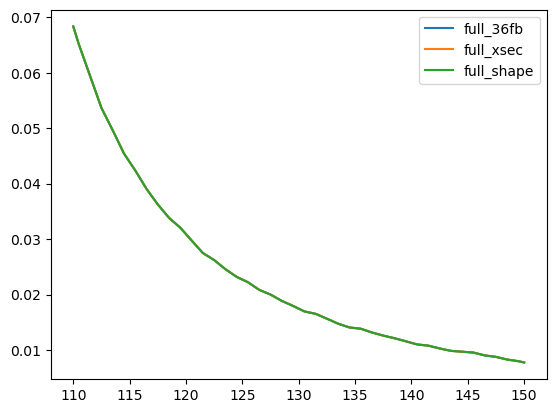

In [115]:
histo_l = [
    FEWZ_histo_36fb,
    FEWZ_histo_full_xsec,
    FEWZ_histo_full_shape,
]
for histo in histo_l:
    x_vals, y_vals = getFEWZ_vals(histo)
    y_vals = y_vals / np.sum(y_vals)
    plt.plot(x_vals, y_vals, label = histo.GetName())
plt.legend(loc="upper right")
plt.show()

In [94]:
str(FEWZ_histo_36fb.GetName())

'full_36fb'

In [75]:
%%bash
combine -M Significance -d combine_test_datacard_long.txt -m 125 -n _signif_cat0_ggh --cminDefaultMinimizerStrategy=0 -t -1 --toysFrequentist --expectSignal 1 --X-rtd FITTER_NEWER_GIVE_UP --X-rtd FITTER_BOUND --setParameters pdf_index=0 --cminRunAllDiscreteCombinations --setParameterRanges r=-10,10 --X-rtd MINIMIZER_freezeDisassociatedParams --cminDefaultMinimizerTolerance=0.1 --X-rtd MINIMIZER_MaxCalls=9999999 --X-rtd FAST_VERTICAL_MORPH --verbose 3


>>> Random number generator seed is 123456
>>> Method used is Significance
Turning on runtime-define FITTER_NEWER_GIVE_UP
Turning on runtime-define FITTER_BOUND
Turning on runtime-define MINIMIZER_freezeDisassociatedParams
Setting runtime-define MINIMIZER_MaxCalls to 9999999
Turning on runtime-define FAST_VERTICAL_MORPH


Will make a binned dataset
Observables: ['dimuon_mass']
Will use category 'CMS_channel' to identify the 1 channels
Creating pdfs for individual modes (1): .   done.
Importing combined pdf model_s
Importing combined pdf model_b



RooWorkspace(w) w contents

variables
---------
(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,CMS_channel,FEWZxBern_Bernstein_c_1,FEWZxBern_Bernstein_c_2,FEWZxBern_Bernstein_c_3,MH,SMF_Order3_Coeff1,SMF_Order3_Coeff2,SMF_Order3_Coeff3,S_exp_a_1,S_exp_b_0,S_exp_b_1,alpha1,alpha2,dimuon_mass,lumi_13TeV_,lumi_13TeV__In,n1,n2,n_exp_bindimuon_mass_proc_background,pdf_index,r,shapeBkg_background_dimuon_mass__norm,shapeSig_signal_dimuon_mass__norm,sigma)

p.d.f.s
-------
RooSimultaneousOpt::model_b[ indexCat=CMS_channel dimuon_mass=pdf_bindimuon_mass_bonly extraConstraints=() channelMasks=() ] = 1.24781e-05
  RooProdPdf::pdf_bindimuon_mass_bonly[ lumi_13TeV__Pdf * pdf_bindimuon_mass_bonly_nuis * pdfbins_bindimuon_mass ] = 1.24781e-05
    SimpleGaussianConstraint::lumi_13TeV__Pdf[ x=lumi_13TeV_ mean=lumi_13TeV__In sigma=1 ] = 1
    RooAddPdf::pdf_bindimuon_mass_bonly_nuis[ n_exp_final_bindimuon_mass_proc_background * shapeBkg_background_dimuon_mass ] = 1.24781e-05/1
      RooMultiPdf

Setting variable 'MH' in workspace to the mass 125


Set Range of Parameter r To : (-10,10)
Set Default Index of Parameter pdf_index To : 0 (was: 0 )
Found a parameter named shapeSig_signal_dimuon_mass__norm infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
Found a parameter named MH infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
Found a parameter named n_exp_bindimuon_mass_proc_background infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooUniform::prior
Adding discrete pdf_index 
Saving snapshot 'clean'
Saved snapshot 'clean'
[#1] INFO:NumericIntegration -- RooRealIntegral::init([pol_X_BWZ_Redux_dof_3]_Norm[dimuon_mass]_denominator_Int[dimuon_mass]) using numeric integrator RooIntegrator1D to calculate Int(dimuon_mass)
Minimization configured w

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =      0.7949653999 NCalls =     21
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 0.7949653999
  Internal parameters:	[     -1.030262793    -0.1744516006     0.1132643743                0    -0.3398369095]	
  Internal gradient  :	[     -15.99337054      369.4173451      1917.538996    -0.3066946643      463.0777712]	
  Internal covariance matrix:
[[  0.00015598986              0              0              0              0]
 [              0  4.0898404e-07              0              0              0]
 [              0              0  7.4910122e-07              0              0]
 [              0              0              0    0.040800371              0]
 [              0              0              0              0  1.5197547e-06]]]
Info in <Minuit2>: VariableMetricBuilder Start i

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -33.5347686596362422
Edm   = 7.62741123286129726e-05
Nfcn  = 89
BWZ_Redux_a_coeff	  = -0.0181437	 +/-  0.000206821	(limited)
BWZ_Redux_b_coeff	  = -0.000190988	 +/-  2.19942e-06	(limited)
BWZ_Redux_c_coeff	  = 0.394102	 +/-  0.0212134	(limited)
lumi_13TeV_	  = 0.0121634	 +/-  0.996099	(limited)
shapeBkg_background_dimuon_mass__norm	  = 658249	 +/-  806.018	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.1
[#1] INFO:NumericIntegration -- RooRealIntegral::init([pol_X_S_exp_dof_3]_Norm[dimuon_mass]_denominator_Int[dimuon_mass]) using numeric integrator RooIntegrator1D to calculate Int(dimuon_mass)
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.1 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =        2.83954654 NCalls =     21
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 2.83954654
  Internal parameters:	[      1.185627643     0.2858757894     0.2743848067                0    -0.3398369095]	
  Internal gradient  :	[     -33.78835763     -10025.90585      -742.891485    -0.2457555947      461.9702189]	
  Internal covariance matrix:
[[   0.0028590065              0              0              0              0]
 [              0  1.3256532e-08              0              0              0]
 [              0              0  1.1659481e-05              0              0]
 [              0              0              0    0.040795493              0]
 [              0              0              0              0  1.5203755e-06]]]
Info in <Minuit2>: VariableMetricBuilder Start ite

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -2.91723625502571515
Edm   = 2.5893858812085328e-05
Nfcn  = 73
S_exp_a_1	  = 0.966791	 +/-  0.00601956	(limited)
S_exp_b_0	  = -0.0774539	 +/-  0.000259982	(limited)
S_exp_b_1	  = -0.0774776	 +/-  0.00697737	(limited)
lumi_13TeV_	  = 0.0361284	 +/-  0.996882	(limited)
shapeBkg_background_dimuon_mass__norm	  = 658251	 +/-  808.991	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.1
[#1] INFO:NumericIntegration -- RooRealIntegral::init([pol_X_FEWZxBern_dof_3]_Norm[dimuon_mass]_denominator_Int[dimuon_mass]) using numeric integrator RooIntegrator1D to calculate Int(dimuon_mass)
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.1 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =       31.54576975 NCalls =     21
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 31.54576975
  Internal parameters:	[     0.0768661998     0.0507524469    0.02307858275                0    -0.3398369095]	
  Internal gradient  :	[      2971.799596     -12237.49805     -28671.23483     0.5390473402      447.4769547]	
  Internal covariance matrix:
[[  2.2782058e-06              0              0              0              0]
 [              0  3.7722411e-07              0              0              0]
 [              0              0  5.9917508e-08              0              0]
 [              0              0              0    0.040767081              0]
 [              0              0              0              0  1.5220421e-06]]]
Info in <Minuit2>: VariableMetricBuilder Start it

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -47.573231979225902
Edm   = 1.51446826919506403e-05
Nfcn  = 69
FEWZxBern_Bernstein_c_1	  = 0.12866	 +/-  0.0031686	(limited)
FEWZxBern_Bernstein_c_2	  = 0.114178	 +/-  0.00161758	(limited)
FEWZxBern_Bernstein_c_3	  = 0.044725	 +/-  0.000530896	(limited)
lumi_13TeV_	  = -0.0313418	 +/-  0.996401	(limited)
shapeBkg_background_dimuon_mass__norm	  = 658252	 +/-  812.84	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.1
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.1 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =   0.0001180206454 NCalls =     21
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 0.0001180206454
  Internal parameters:	[       -1.1830116    -0.1921682643     0.0789022415   0.001737624232    -0.3401851805]	
  Internal gradient  :	[      1.096521147     -12.59904043      1.452755073    0.03651173314    -0.3049397718]	
  Internal covariance matrix:
[[  0.00029087392              0              0              0              0]
 [              0  4.1571732e-07              0              0              0]
 [              0              0  8.6239794e-07              0              0]
 [              0              0              0     0.04080502              0]
 [              0              0              0              0  1.5169105e-06]]]
Info in <Minuit2>: VariableMetricBuilder Star

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -0.284761751704106003
Edm   = 8.97909791102390144e-06
Nfcn  = 391
BWZ_Redux_a_coeff	  = -0.0199948	 +/-  0.000581867	(limited)
BWZ_Redux_b_coeff	  = -0.000185431	 +/-  2.97569e-06	(limited)
BWZ_Redux_c_coeff	  = 0.381439	 +/-  0.0190171	(limited)
lumi_13TeV_	  = 0.00800025	 +/-  0.980994	(limited)
shapeBkg_background_dimuon_mass__norm	  = 658249	 +/-  811.189	(limited)
Minimization finished with status=0
Minimization success! status=0
[WARNING] Found parameter BWZ_Redux_a_coeff at boundary (within ~1sigma): -0.0199948+/-0.000581867
[WARNING] After fit, some parameters are found at the boundary (within ~1sigma)
Nuisance parameters after fit for asimov dataset: 
  1) RooRealVar:: lumi_13TeV_ = 0.00800025 +/- 0.980994
Parameters after fit for asimov dataset
BWZ_Redux_a_coeff = -0.0199948 
BWZ_Redux_b_coeff = -0.000185431 
BWZ_Redux_c_coeff = 0.381439 
FEWZxBern_Bernstein_c_1 = 0.153581 
FEWZxBern_Bernstein_c_2 = 0.101461 
FEWZxBern_Ber

In [ ]:
    """
    simultaneous  fit results from stage2ToSMF_fitV2.py
    """

In [79]:
%%bash
combine -M Significance -d test_datacardV2.txt -m 125 -n _signif_cat0_ggh --cminDefaultMinimizerStrategy=0 -t -1 --toysFrequentist --expectSignal 1 --X-rtd FITTER_NEWER_GIVE_UP --X-rtd FITTER_BOUND --setParameters pdf_index=0 --cminRunAllDiscreteCombinations --setParameterRanges r=-10,10 --X-rtd MINIMIZER_freezeDisassociatedParams --cminDefaultMinimizerTolerance=0.1 --X-rtd MINIMIZER_MaxCalls=9999999 --X-rtd FAST_VERTICAL_MORPH --verbose 3


>>> Random number generator seed is 123456
>>> Method used is Significance
Turning on runtime-define FITTER_NEWER_GIVE_UP
Turning on runtime-define FITTER_BOUND
Turning on runtime-define MINIMIZER_freezeDisassociatedParams
Setting runtime-define MINIMIZER_MaxCalls to 9999999
Turning on runtime-define FAST_VERTICAL_MORPH


Will make a binned dataset
Observables: ['mh_ggh']
Will use category 'CMS_channel' to identify the 1 channels
Creating pdfs for individual modes (1): .   done.
Importing combined pdf model_s
Importing combined pdf model_b



RooWorkspace(w) w contents

variables
---------
(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,CMS_channel,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,lumi_13TeV_In,mh_ggh,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,pdf_index_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0)

p.d.f.s
-------
RooSimultaneousOpt::model_b[ indexCat=CMS_channel mh_ggh=pdf_binmh_ggh_bonly extraConstraints=() channelMasks=() ] = 0.00010013
  RooProdPdf::pdf_binmh_ggh_bonly[ lumi_13TeV_Pdf * pdf_binmh_ggh_bonly_nuis * pdfbins_binmh_ggh ] = 0.00010013
    SimpleGaussianConstraint::lumi_13TeV_Pdf[ x=lumi_13TeV mean=lumi_13TeV_In sigma=1 ] = 1
    RooAddPdf::pdf_binmh_ggh_bonly_nuis[ n_exp_final_binmh_ggh_proc_CorePdf_subCat0 * shapeBkg_CorePdf_subCat0_mh_ggh ] = 0.00010013/1
      Roo

Setting variable 'MH' in workspace to the mass 125


Set Range of Parameter r To : (-10,10)
Found a parameter named shapeSig_signal_subCat0_mh_ggh__norm infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
Found a parameter named MH infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
Found a parameter named n_exp_binmh_ggh_proc_CorePdf_subCat0 infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooUniform::prior
Adding discrete pdf_index_subCat0 
Saving snapshot 'clean'
Saved snapshot 'clean'
[#1] INFO:NumericIntegration -- RooRealIntegral::init([subCat0_BWZ_Redux_X_subCat0_SMF]_Norm[mh_ggh]_denominator_Int[mh_ggh]) using numeric integrator RooIntegrator1D to calculate Int(mh_ggh)
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =        76.8445766 NCalls =     33
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 76.8445766
  Internal parameters:	[    -0.3097551648    -0.1839904947     0.1039896522     0.3090666834     0.1636279607   -0.01642676537                0    -0.3398369095]	
  Internal gradient  :	[      10.45442812      877.0095344       1789.26114     -99.81234949      4994.832428     -5827.084911    -0.3657763406      464.1688707]	
  Internal covariance matrix:
[[   4.538942e-05              0              0              0              0              0              0              0]
 [              0  4.1004674e-07              0              0              0              0              0              0]
 [              0              0  7.6302977e-07              0              0              0     

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -65.778248251601795
Edm   = 1.66197620011416809e-05
Nfcn  = 1134
BWZ_Redux_a_coeff	  = 0.00301131	 +/-  0.00195997	(limited)
BWZ_Redux_b_coeff	  = -5.18921e-05	 +/-  7.01014e-05	(limited)
BWZ_Redux_c_coeff	  = 2.56801	 +/-  1.00769	(limited)
a0_subCat0	  = 0.774411	 +/-  0.160169	(limited)
a1_subCat0	  = 0.114058	 +/-  0.0030388	(limited)
a3_subCat0	  = 0.00895345	 +/-  0.00688749	(limited)
lumi_13TeV	  = -0.0160752	 +/-  0.993745	(limited)
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 658251	 +/-  811.04	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.1
[#1] INFO:NumericIntegration -- RooRealIntegral::init([subCat0_sumExp_X_subCat0_SMF_sumExp]_Norm[mh_ggh]_denominator_Int[mh_ggh]) using numeric integrator RooIntegrator1D to calculate Int(mh_ggh)
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.1 strategy

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =       73.98809575 NCalls =     33
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 73.98809575
  Internal parameters:	[     0.2945837078     0.9694850244      1.552004856     0.3090666834     0.1636279607   -0.01642676537                0    -0.3398369095]	
  Internal gradient  :	[     -11361.54861     0.1853791937      -87.1538041     -695.9257432      5847.526024     -4444.829513    -0.3870685488      464.5802554]	
  Internal covariance matrix:
[[  1.2498329e-08              0              0              0              0              0              0              0]
 [              0     0.60906407              0              0              0              0              0              0]
 [              0              0  0.00018340736              0              0              0    

FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1.47035) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.941961	RooSumTwoExpPdf_a2_coeff=-0.755091	RooSumTwoExpPdf_f_coeff=0.298511	a0_subCat0=0.379644	a1_subCat0=0.276496	a3_subCat0=-0.993589	lumi_13TeV=2.52101	shapeBkg_CorePdf_subCat0_mh_ggh__norm=74479.4
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 0.001

Info in <Minuit2>: VariableMetricBuilder    9 - FCN =        -57.114281 Edm =       45485.67372 NCalls =    231


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (5.26629e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.43953	RooSumTwoExpPdf_a2_coeff=-0.767286	RooSumTwoExpPdf_f_coeff=0.0377051	a0_subCat0=0.985472	a1_subCat0=0.496213	a3_subCat0=-0.54605	lumi_13TeV=2.52652	shapeBkg_CorePdf_subCat0_mh_ggh__norm=652691
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 0.0

Info in <Minuit2>: VariableMetricBuilder   10 - FCN =      -57.11667923 Edm =       16115.54763 NCalls =    253


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (5.26629e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.52965	RooSumTwoExpPdf_a2_coeff=-0.785918	RooSumTwoExpPdf_f_coeff=0.390486	a0_subCat0=0.969497	a1_subCat0=0.520964	a3_subCat0=0.883976	lumi_13TeV=2.50719	shapeBkg_CorePdf_subCat0_mh_ggh__norm=960768
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 0.00

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Info in <Minuit2>: DavidonErrorUpdator Explanation:
   The distance from the minimum cannot be estimated, since the minimized
   function seems not to be strictly convex in the space probed by the fit.
   That is expected if the starting parameters are e.g. close to a local maximum
   of the minimized function. If this function is expected to be fully convex
   in the probed range or Minuit is already close to the function minimum, this
   may hint to numerical or analytical issues with the minimized function.
   This was found by projecting the difference of gradients at two points, s0 and p1,
   onto the direction given by the difference of s0 and p1, where:
 * s0:  	[      0.294301837     0.6790096936      1.566359588     0.3107023109     0.1467240711    -0.0122975401  -0.001024705627    -0.3401357777]	 
 * p1:  	[     0.2938748211     0.6789008443      1.54380

FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (5.26629e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.33418	RooSumTwoExpPdf_a2_coeff=-0.771946	RooSumTwoExpPdf_f_coeff=0.515692	a0_subCat0=0.908253	a1_subCat0=-0.194755	a3_subCat0=-0.60487	lumi_13TeV=2.5147	shapeBkg_CorePdf_subCat0_mh_ggh__norm=29029.3
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 0.0

Info in <Minuit2>: VariableMetricBuilder   12 - FCN =      -58.81118754 Edm =       15050.49688 NCalls =    296


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (5.26629e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=0.728759	RooSumTwoExpPdf_a2_coeff=-0.669557	RooSumTwoExpPdf_f_coeff=0.00571458	a0_subCat0=-0.377365	a1_subCat0=-0.899266	a3_subCat0=0.608723	lumi_13TeV=2.49813	shapeBkg_CorePdf_subCat0_mh_ggh__norm=7178.02
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/-

Info in <Minuit2>: VariableMetricBuilder   13 - FCN =      -58.82463824 Edm =       1083.294987 NCalls =    317
Info in <Minuit2>: VariableMetricBuilder   14 - FCN =      -58.98517954 Edm =       52.89329383 NCalls =    337
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 2.30601 > 0
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 0.651059
Warning in <Minuit2>: VariableMetricBuilder gdel = -345.798


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (5.26629e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.86195	RooSumTwoExpPdf_a2_coeff=-0.363782	RooSumTwoExpPdf_f_coeff=0.0323702	a0_subCat0=0.0832186	a1_subCat0=-0.295168	a3_subCat0=-0.917745	lumi_13TeV=2.37496	shapeBkg_CorePdf_subCat0_mh_ggh__norm=690037
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 

Info in <Minuit2>: VariableMetricBuilder   15 - FCN =      -59.18434601 Edm =       88.11884966 NCalls =    356
Info in <Minuit2>: VariableMetricBuilder   16 - FCN =       -60.0200088 Edm =       2.840159992 NCalls =    374
Info in <Minuit2>: VariableMetricBuilder   17 - FCN =      -60.04461346 Edm =       2.105456465 NCalls =    393
Info in <Minuit2>: VariableMetricBuilder   18 - FCN =      -60.05028656 Edm =        0.30153292 NCalls =    412
Info in <Minuit2>: VariableMetricBuilder   19 - FCN =      -60.39362586 Edm =     0.09339638054 NCalls =    431
Info in <Minuit2>: VariableMetricBuilder   20 - FCN =      -60.49534242 Edm =       0.140700634 NCalls =    449
Info in <Minuit2>: VariableMetricBuilder   21 - FCN =      -60.56677342 Edm =      0.1537465054 NCalls =    467
Info in <Minuit2>: VariableMetricBuilder   22 - FCN =        -60.660942 Edm =     0.04118593198 NCalls =    485
Info in <Minuit2>: VariableMetricBuilder   23 - FCN =      -60.70771966 Edm =     0.01650704816 NCalls =

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -68.561030051794873
Edm   = 6.82343700863220456e-05
Nfcn  = 1176
RooSumTwoExpPdf_a1_coeff	  = -0.0860078	 +/-  0.00482865	(limited)
RooSumTwoExpPdf_a2_coeff	  = 0.0536825	 +/-  0.057452	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.990552	 +/-  0.0120247	(limited)
a0_subCat0	  = 0.636725	 +/-  0.115251	(limited)
a1_subCat0	  = 0.181951	 +/-  0.0419324	(limited)
a3_subCat0	  = 0.00141994	 +/-  0.0135524	(limited)
lumi_13TeV	  = -0.0139603	 +/-  0.996438	(limited)
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 658252	 +/-  829.084	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.1
[#1] INFO:NumericIntegration -- RooRealIntegral::init([fewz_roospline_func_X_subCat0_SMF_FEWZxBern]_Norm[mh_ggh]_denominator_Int[mh_ggh]) using numeric integrator RooIntegrator1D to calculate Int(mh_ggh)
Minuit2Minimizer: Minimize with max-calls 9999999 convergen

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =       21.16811645 NCalls =     33
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 21.16811645
  Internal parameters:	[     0.1327441762     0.0725135992     0.0388317531     0.3090666834     0.1636279607   -0.01642676537                0    -0.3398369095]	
  Internal gradient  :	[     -257.4304451     -3298.441519     -5317.111817     -875.0179451     -621.7738722      3537.542831     0.1343304557      454.9516021]	
  Internal covariance matrix:
[[  4.0685919e-06              0              0              0              0              0              0              0]
 [              0  8.3494047e-07              0              0              0              0              0              0]
 [              0              0  1.5496028e-07              0              0              0    

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -22.9446411585824706
Edm   = 1.22829622565506843e-05
Nfcn  = 200
FEWZxBern_c1	  = 0.250084	 +/-  0.0320175	(limited)
FEWZxBern_c2	  = 0.130515	 +/-  0.00376714	(limited)
FEWZxBern_c3	  = 0.0792063	 +/-  0.00114403	(limited)
a0_subCat0	  = 0.309969	 +/-  0.00280732	(limited)
a1_subCat0	  = 0.142534	 +/-  0.0204174	(limited)
a3_subCat0	  = -0.0378223	 +/-  0.00666345	(limited)
lumi_13TeV	  = -0.0135242	 +/-  0.996208	(limited)
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 658253	 +/-  814.196	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.1
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.1 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =   4.730972723e-05 NCalls =     33
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 4.730972723e-05
  Internal parameters:	[     0.2796245192     0.3780637907      1.376089927     0.6902440627     0.1829701515   0.001419942325  -0.001994333865    -0.3401812107]	
  Internal gradient  :	[      38.88497672    -0.9030892305     0.3167322736      2.201400501      -5.24035549      1.794229687   0.001288021512      2.066677258]	
  Internal covariance matrix:
[[   1.403217e-08              0              0              0              0              0              0              0]
 [              0  1.3573902e-05              0              0              0              0              0              0]
 [              0              0  3.0253951e-05              0              0              0

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -2.47284076824839743e-05
Edm   = 5.22277458864078205e-06
Nfcn  = 59
RooSumTwoExpPdf_a1_coeff	  = -0.086008	 +/-  0.000112603	(limited)
RooSumTwoExpPdf_a2_coeff	  = 0.053687	 +/-  0.00367938	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.990552	 +/-  0.000376496	(limited)
a0_subCat0	  = 0.636722	 +/-  0.00143648	(limited)
a1_subCat0	  = 0.181956	 +/-  0.00118574	(limited)
a3_subCat0	  = 0.0014185	 +/-  0.00121362	(limited)
lumi_13TeV	  = -0.0140565	 +/-  0.996716	(limited)
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 658252	 +/-  815.249	(limited)
Minimization finished with status=0
Minimization success! status=0
Nuisance parameters after fit for asimov dataset: 
  1) RooRealVar:: lumi_13TeV = -0.0140565 +/- 0.996716
Parameters after fit for asimov dataset
BWZ_Redux_a_coeff = -0.00262064 
BWZ_Redux_b_coeff = -0.000182954 
BWZ_Redux_c_coeff = 0.519012 
FEWZxBern_c1 = 0.264709 
FEWZxBern_c2 = 0.1449 
FEWZxBern_c3 = 0.077644 
MH_subCat0 = 125 (co

In [12]:
%%bash
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL -n Envelope_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 -t -1 --toysFrequentist --expectSignal 1 --X-rtd FITTER_NEWER_GIVE_UP --X-rtd FITTER_BOUND --setParameters pdf_index_subCat0=0 --cminRunAllDiscreteCombinations --X-rtd MINIMIZER_freezeDisassociatedParams --cminDefaultMinimizerTolerance=0.01 --X-rtd MINIMIZER_MaxCalls=9999999 --X-rtd FAST_VERTICAL_MORPH &> outputV2.log

In [13]:
%%bash
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index_subCat0 --setParameters pdf_index_subCat0=0 -n fixed_pdf_0_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 -t -1 --toysFrequentist --expectSignal 1 --X-rtd FITTER_NEWER_GIVE_UP --X-rtd FITTER_BOUND --cminRunAllDiscreteCombinations --X-rtd MINIMIZER_freezeDisassociatedParams --cminDefaultMinimizerTolerance=0.01 --X-rtd MINIMIZER_MaxCalls=9999999 --X-rtd FAST_VERTICAL_MORPH 
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index_subCat0 --setParameters pdf_index_subCat0=1 -n fixed_pdf_1_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 -t -1 --toysFrequentist --expectSignal 1 --X-rtd FITTER_NEWER_GIVE_UP --X-rtd FITTER_BOUND --cminRunAllDiscreteCombinations --X-rtd MINIMIZER_freezeDisassociatedParams --cminDefaultMinimizerTolerance=0.01 --X-rtd MINIMIZER_MaxCalls=9999999 --X-rtd FAST_VERTICAL_MORPH 
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 --saveNLL --freezeParameters pdf_index_subCat0 --setParameters pdf_index_subCat0=2 -n fixed_pdf_2_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 -t -1 --toysFrequentist --expectSignal 1 --X-rtd FITTER_NEWER_GIVE_UP --X-rtd FITTER_BOUND --cminRunAllDiscreteCombinations --X-rtd MINIMIZER_freezeDisassociatedParams --cminDefaultMinimizerTolerance=0.01 --X-rtd MINIMIZER_MaxCalls=9999999 --X-rtd FAST_VERTICAL_MORPH     
    


 <<< Combine >>> 
 <<< v10.0.1 >>>
>>> Random number generator seed is 123456
>>> Method used is MultiDimFit
Doing initial fit: 
 POI: r= 1.00385 -> [-10,10]
Point 0/50 r = -9.8
Point 1/50 r = -9.4
Point 2/50 r = -9
Point 3/50 r = -8.6
Point 4/50 r = -8.2
Point 5/50 r = -7.8
Point 6/50 r = -7.4
Point 7/50 r = -7
Point 8/50 r = -6.6
Point 9/50 r = -6.2
Point 10/50 r = -5.8
Point 11/50 r = -5.4
Point 12/50 r = -5
Point 13/50 r = -4.6
Point 14/50 r = -4.2
Point 15/50 r = -3.8
Point 16/50 r = -3.4
Point 17/50 r = -3
Point 18/50 r = -2.6
Point 19/50 r = -2.2
Point 20/50 r = -1.8
Point 21/50 r = -1.4
Point 22/50 r = -1
Point 23/50 r = -0.6
Point 24/50 r = -0.2
Point 25/50 r = 0.2
Point 26/50 r = 0.6
Point 27/50 r = 1
Point 28/50 r = 1.4
Point 29/50 r = 1.8
Point 30/50 r = 2.2
Point 31/50 r = 2.6
FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (0.0117348) to force MIGRAD to back out of this region. Error log follows.
Pa

x_arr: [-9.8, -9.4, -9, -8.6, -8.2, -7.8, -7.4, ..., 7.4, 7.8, 8.2, 8.6, 9, 9.4, 9.8]
y_arr: [4.63e+06, 4.63e+06, 4.63e+06, 4.63e+06, ..., 4.63e+06, 4.63e+06, 4.63e+06]
x_arr: [-9.8, -9.4, -9, -8.6, -8.2, -7.8, -7.4, -7, ..., 6.2, 6.6, 7, 7.4, 9, 9.4, 9.8]
y_arr: [4.63e+06, 4.63e+06, 4.63e+06, 4.63e+06, ..., 4.63e+06, 4.63e+06, 4.63e+06]
x_arr: [-9.8, -9.4, -9, -8.6, -8.2, -7.8, -7.4, ..., 7.4, 7.8, 8.2, 8.6, 9, 9.4, 9.8]
y_arr: [4.63e+06, 4.63e+06, 4.63e+06, 4.63e+06, ..., 4.63e+06, 4.63e+06, 4.63e+06]
x_arr: [-9.8, -9.4, -9, -8.6, -8.2, -7.8, -7.4, ..., 7.4, 7.8, 8.2, 8.6, 9, 9.4, 9.8]
y_arr: [4.63e+06, 4.63e+06, 4.63e+06, 4.63e+06, ..., 4.63e+06, 4.63e+06, 4.63e+06]


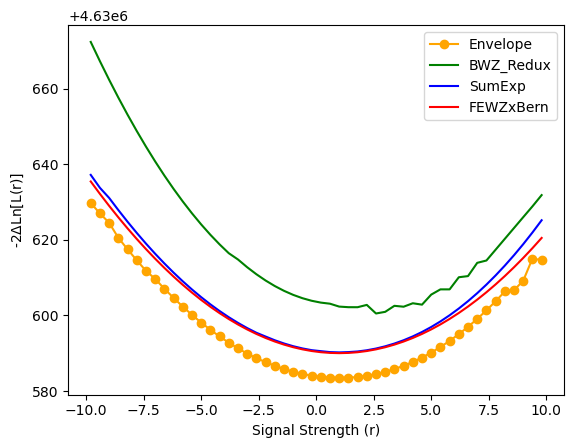

In [15]:
load_path_dict = {
    "Envelope": "./higgsCombineEnvelope_V2.MultiDimFit.mH125.root",
    "BWZ_Redux": "./higgsCombinefixed_pdf_0_V2.MultiDimFit.mH125.root",
    "SumExp": "./higgsCombinefixed_pdf_1_V2.MultiDimFit.mH125.root",
    "FEWZxBern": "./higgsCombinefixed_pdf_2_V2.MultiDimFit.mH125.root",

}
color_map = {
    "BWZ_Redux": "Green",
    "SumExp": "Blue",
    "FEWZxBern": "Red",
    # "PowerLaw": "Red",
    # "BWZxBern": "Purple",
}
for process, load_path in load_path_dict.items():
    x_arr,y_arr = getRandNLL(load_path)
    print(f"x_arr: {(x_arr)}")
    print(f"y_arr: {y_arr}")
    if "Envelope" in load_path:
        plt.plot(x_arr,y_arr, color='orange', marker='o', label=process)
    else:
        plt.plot(x_arr,y_arr, color=color_map[process], label=process)
plt.legend()
# plt.xlim([0.0, 10.0])
# plt.xlim([-10.0, 0.0])
# plt.ylim([-100, 20000])
# plt.ylim([1.2e6, 1.4e6])
plt.xlabel("Signal Strength (r)")
# plt.ylabel("-2lnL(r) + c")
plt.ylabel("-2$\\Delta$Ln[L(r)]")
plt.show()

In [40]:
%%bash
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 -t -1 --saveNLL -n Envelope_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 --cminDefaultMinimizerTolerance=0.01  --X-rtd MINIMIZER_freezeDisassociatedParams --X-rtd MINIMIZER_MaxCalls=9999999  --verbose 2 


>>> Random number generator seed is 123456
>>> Method used is MultiDimFit
Setting runtime-define REMOVE_CONSTANT_ZERO_POINT to 1
Turning on runtime-define MINIMIZER_freezeDisassociatedParams
Setting runtime-define MINIMIZER_MaxCalls to 9999999


Creating pdfs for individual modes (1): .   done.
Importing combined pdf model_s


Set Range of Parameter r To : (-10,10)
Adding discrete pdf_index_subCat0 
Using internal logic for binned/unbinned Asimov dataset generation
Generating asimov with histogram for pdf pdf_binmh_ggh_obsOnly: in 800 x-bins
Doing initial fit: 
 POI: r= 0.100583 -> [-10,10]
Print snap: 
  1) RooRealVar::                            lumi_13TeV = -1.36665e-07 +/- 0.999767
  2) RooRealVar::                         lumi_13TeV_In = 0
  3) RooRealVar::                     BWZ_Redux_a_coeff = -0.00262055 +/- 0
  4) RooRealVar::                     BWZ_Redux_b_coeff = -0.000182954 +/- 0
  5) RooRealVar::                     BWZ_Redux_c_coeff = 0.518992 +/- 0
  6) RooRealVar::                          FEWZxBern_c1 = 0.264709 +/- 0
  7) RooRealVar::                          FEWZxBern_c2 = 0.1449 +/- 0
  8) RooRealVar::                          FEWZxBern_c3 = 0.077644 +/- 0
  9) RooRealVar::                            MH_subCat0 = 125
 10) RooRealVar::              RooSumTwoExpPdf_a1_coeff = -0.0646178 

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.0620517 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -5.97413e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -0.000732036
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.0458249
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -0.0395642
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -0.00621888
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -0.000796491
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.545825
Warning in <Minuit2>: VariableMetricBuilder gdel = -1.31854e+06


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (10926.9) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.82672	RooSumTwoExpPdf_a2_coeff=-1.95996	RooSumTwoExpPdf_f_coeff=0.358923	a0_subCat0=-0.783295	a1_subCat0=-0.317578	a3_subCat0=0.243009
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00125813 +/- 0.000499336,BWZ_Redux_b_coeff = -0.00014611 +/- 1.2154e-05,BWZ_Redux_c_

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.0949781 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.0299306 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -1.5165051972104715e-06
Edm   = 1.64871732612162413e-06
Nfcn  = 57
BWZ_Redux_a_coeff	  = -0.00262055	 (fixed)
BWZ_Redux_b_coeff	  = -0.000182954	 (fixed)
BWZ_Redux_c_coeff	  = 0.518992	 (fixed)
FEWZxBern_c1	  = 0.179206	 +/-  0.00240419	(limited)
FEWZxBern_c2	  = 0.148921	 +/-  0.00140332	(limited)
FEWZxBern_c3	  = 0.105014	 +/-  0.000663984	(limited)
RooSumTwoExpPdf_a1_coeff	  = -0.0763089	 (fixed)
RooSumTwoExpPdf_a2_coeff	  = -0.042618	 (fixed)
RooSumTwoExpPdf_f_coeff	  = 1	 (fixed)
a0_subCat0	  = 0.15783	 +/-  0.00193176	(limited)
a1_subCat0	  = 0.0276271	 +/-  0.00170725	(limited)
a3_subCat0	  = -0.0831404	 +/-  0.00164955	(limited)
lumi_13TeV	  = -0.413086	 +/-  0.992853
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 661766	 +/-  891.105	(limited)
Minimization finished with status=0
Minimization success! status=0
Point 1/50 r = -9.4
Point (1/50) r = -9.400000
List of points to try for : 
	The vals at this point: 

	Start pt idx: 0
M

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Edm is limited by Machine accuracy - return current minimum
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.000136401 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -8485.35
Edm   = 0.000136401
Nfcn  = 1881
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -4.6356406162295638e-07
Edm   = 5.0630209472760596e-07
Nfcn  = 55
BWZ_Redux_a_coeff	  = -0.00262055	 (fixed)
BWZ_Redux_b_coeff	  = -0.000182954	 (fixed)
BWZ_Redux_c_coeff	  = 0.518992	 (fixed)
FEWZxBern_c1	  = 0.183278	 +/-  0.00232024	(limited)
FEWZxBern_c2	  = 0.150272	 +/-  0.00156857	(limited)
FEWZxBern_c3	  = 0.105945	 +/-  0.000703837	(limited)
RooSumTwoExpPdf_a1_coeff	  = -0.0760539	 (fixed)
RooSumTwoExpPdf_a2_coeff	  = -0.0763969	 (fixed)
RooSumTwoExpPdf_f_coeff	  = 0.279553	 (fixed

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 483495 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 120874 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -26467.1387881324627
Edm   = 1.8863147249223203e-06
Nfcn  = 268
BWZ_Redux_a_coeff	  = -0.00201721	 +/-  0.00211293	(limited)
BWZ_Redux_b_coeff	  = -0.00014881	 +/-  2.44241e-05	(limited)
BWZ_Redux_c_coeff	  = 1.18326	 +/-  0.233316	(limited)
a0_subCat0	  = 0.560196	 +/-  0.0151881	(limited)
a1_subCat0	  = 0.149018	 +/-  0.0248417	(limited)
a3_subCat0	  = 0.00572723	 +/-  0.00312053	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default 

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 540336 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 135084 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -27900.7256177444942
Edm   = 2.83367242972047512e-06
Nfcn  = 264
BWZ_Redux_a_coeff	  = -0.00198408	 +/-  0.00216955	(limited)
BWZ_Redux_b_coeff	  = -0.000148922	 +/-  2.53154e-05	(limited)
BWZ_Redux_c_coeff	  = 1.18204	 +/-  0.250236	(limited)
a0_subCat0	  = 0.559388	 +/-  0.0101084	(limited)
a1_subCat0	  = 0.148913	 +/-  0.0248917	(limited)
a3_subCat0	  = 0.00567256	 +/-  0.0028318	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -0.000233354236896465839
Edm   = 1.72525088275800549e-06
Nfcn  = 74
BWZ_Redux_a_coeff	  = -0.00262055	 (fixed)
BWZ_Redux_b_coeff	  = -0.000182954	 (fixed)
BWZ_Re

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 515176 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 128794 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -27088.6759154601023
Edm   = 4.32405562271988937e-07
Nfcn  = 265
BWZ_Redux_a_coeff	  = -0.00196267	 +/-  0.00210279	(limited)
BWZ_Redux_b_coeff	  = -0.000148827	 +/-  2.45335e-05	(limited)
BWZ_Redux_c_coeff	  = 1.18182	 +/-  0.242777	(limited)
a0_subCat0	  = 0.558419	 +/-  0.00967615	(limited)
a1_subCat0	  = 0.148662	 +/-  0.0240647	(limited)
a3_subCat0	  = 0.00559718	 +/-  0.00280019	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid min

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 8.18513 > 0
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 0.00388134
Warning in <Minuit2>: VariableMetricBuilder gdel = -5.51635e+06
Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 3.07465e+08 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 3.05398e+08 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -25.4874
Edm   = 3.05398e+08
Nfcn  = 2095
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -0.206024769227951765
Edm   = 7.26352013176656807e-07
Nfcn  = 74
RooSumTwoExpPdf_a1_coeff	  = -0.084485	 +/-  0.000192351	(limited)
RooSumTwoExpPdf_a2_coeff	  = -0.296777	 +/-  3.98384e-06	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.846998	 +/-  0.00212497	(limited)
a0_subCat0	  = 0.805626	 +/-  5.00845e-06	(limited)
a1_subCat0	  = 0.203098	 +/-  4.72938e-06	(limited)
a3_subCat0	  = 0.0497595	 +/-  1.35526e-06	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimiza

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 754697 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 188674 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -38697.6789162824862
Edm   = 6.2591517864766004e-07
Nfcn  = 222
BWZ_Redux_a_coeff	  = -0.00264409	 +/-  0.00263368	(limited)
BWZ_Redux_b_coeff	  = -0.000150656	 +/-  2.85758e-05	(limited)
BWZ_Redux_c_coeff	  = 1.15811	 +/-  0.184002	(limited)
a0_subCat0	  = 0.565542	 +/-  0.0739129	(limited)
a1_subCat0	  = 0.152826	 +/-  0.0372806	(limited)
a3_subCat0	  = 0.00627915	 +/-  0.0074134	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default 

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 8.55271 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 2.13818 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 2.13818
Nfcn  = 32
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1474.72) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	FEWZxBern_c1=-0.983487	FEWZxBern_c2=-0.54214	FEWZxBern_c3=-0.0761091	a0_subCat0=0.23275	a1_subCat0=0.380941	a3_subCat0=0.0500495
RooProdPdf::model_SubCat0_SMFxFEWZxBern[ fewz_roospline_func * subCat0_SMF_FEWZxBern ]
     p.d.f value is less than zero (-0.276725), trying to recover @ !pdfs=(fewz_roospline_func = 0.996284,subCat0_SMF_FEWZxBern = 1.

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 754539 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 188635 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -38695.0013910825364
Edm   = 8.57888483221816453e-07
Nfcn  = 208
BWZ_Redux_a_coeff	  = -0.0026395	 +/-  0.0028653	(limited)
BWZ_Redux_b_coeff	  = -0.000150599	 +/-  3.10762e-05	(limited)
BWZ_Redux_c_coeff	  = 1.15861	 +/-  0.199709	(limited)
a0_subCat0	  = 0.565486	 +/-  0.0801133	(limited)
a1_subCat0	  = 0.15276	 +/-  0.0405062	(limited)
a3_subCat0	  = 0.00627156	 +/-  0.00816079	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 11.2816 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 2.8204 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 2.8204
Nfcn  = 42
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Point 4/50 r = -8.2
Point (4/50) r = -8.200000
List of points to try for : 
	The vals at this point: 

	Start pt idx: 0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -19.8745946223369891
Edm   = 1.96356827105833889e-06
Nfcn  = 1554
RooSumTwoExpPdf_a1_coeff	  = -0.0221471	 +/-  0.0193992	(limited)
RooSumTwoExpPdf_a2_coeff	  = -0.153299	 +/-  0.0343088	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.871794	 +/-  0.0666214	(limited)
a0_subCat0	  = -0.361494	 +/-  0.244797	(limited)
a1_subCat0	  = 0.0768626	 +/-  0.00417132	(limited)
a3_subCat0	  = -0.0182051	 

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.630277 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -2.55659
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -0.0228481
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -3.18453
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -0.159943
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -0.0177735
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 3.68453
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 2.9235
Warning in <Minuit2>: VariableMetricBuilder gdel = -692871


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (476870) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	BWZ_Redux_a_coeff=-0.0182486	BWZ_Redux_b_coeff=-0.000979591	BWZ_Redux_c_coeff=3.79303	a0_subCat0=0.99144	a1_subCat0=0.370219	a3_subCat0=-0.349154
RooProdPdf::model_subCat0_SMFxBWZRedux[ subCat0_BWZ_Redux * subCat0_SMF ]
     p.d.f value is less than zero (-0.000081), trying to recover @ !pdfs=(subCat0_BWZ_Redux = 1.22235e-21,subCat0_SMF = -0.00167838)
     p.d.f value is less than zero (-0.000157), trying to recover @ !pdfs=(subCat0_BWZ_Redux = 1.19741e-21,subCat0_SMF = -0.00332675)
     p.d.f value is less than zero (-0.000228), trying to recover @ !pdfs=(subCat0_BWZ_Redux = 1.17298e-21,subCat0_SMF = -0.00493214)
     p.d.f value is less than zero (-0.000295), trying to recover @ !pdfs=(subCat0_BWZ_Redux = 1.14907e-21,subCat0_SMF = -0.0064947)
     p.d.f value is less than ze

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -32157.3383900788613
Edm   = 4.21442838796383108e-05
Nfcn  = 4008
BWZ_Redux_a_coeff	  = -0.0198845	 +/-  0.000706633	(limited)
BWZ_Redux_b_coeff	  = -7.54144e-05	 +/-  9.94936e-05	(limited)
BWZ_Redux_c_coeff	  = 0.966959	 +/-  0.224199	(limited)
a0_subCat0	  = 0.397219	 +/-  0.362863	(limited)
a1_subCat0	  = 0.117085	 +/-  0.0992603	(limited)
a3_subCat0	  = -0.00821651	 +/-  0.0265265	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -0.065185910595142782
Edm   = 7.69948694531429677e-06
Nfcn  = 414
BWZ_Redux_a_coeff	  = -0.00262055	 (fixed)
BWZ_Redux_b_coeff	  = -0.000182954	 (fixed)
BWZ_Re

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def., try to make pos.def.
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -1.69133e-05
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.500017


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (748642) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=0.590594	RooSumTwoExpPdf_a2_coeff=-1.79833	RooSumTwoExpPdf_f_coeff=0.999716	a0_subCat0=-0.709495	a1_subCat0=-0.969366	a3_subCat0=-0.582755
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.001174), trying to recover @ !pdfs=(subCat0_sumExp = 0.000487612,subCat0_SMF_sumExp = 1.3203)
     p.d.f value is less than zero (-0.001069), trying to recover @ !pdfs=(subCat0_sumExp = 0.000445681,subCat0_SMF_sumExp = 1.31517)
     p.d.f value is less than zero (-0.000973), trying to recover @ !pdfs=(subCat0_sumExp = 0.000407356,subCat0_SMF_sumExp = 1.3101)
     p.d.f value is less than zero (-0.000886), trying to recover @ !pdfs=(subCat0_sumExp = 0.000372326,subCat0_SMF_sumExp = 1.3051)
     p.d.f val

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 7.13492e+09 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 2.47454e+09 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -5.76673046120967925e-07
Edm   = 3.28116850088252056e-07
Nfcn  = 57
BWZ_Redux_a_coeff	  = -0.00262055	 (fixed)
BWZ_Redux_b_coeff	  = -0.000182954	 (fixed)
BWZ_Redux_c_coeff	  = 0.518992	 (fixed)
FEWZxBern_c1	  = 0.1962	 +/-  0.00256053	(limited)
FEWZxBern_c2	  = 0.15457	 +/-  0.00117619	(limited)
FEWZxBern_c3	  = 0.108642	 +/-  0.000686494	(limited)
RooSumTwoExpPdf_a1_coeff	  = -0.0221471	 (fixed)
RooSumTwoExpPdf_a2_coeff	  = -0.153299	 (fixed)
RooSumTwoExpPdf_f_coeff	  = 0.871794	 (fixed)
a0_subCat0	  = 0.139339	 +/-  0.00202345	(limited)
a1_subCat0	  = 0.0367018	 +/-  0.00176421	(limited)
a3_subCat0	  = -0.0801649	 +/-  0.00168334	(limited)
lumi_13TeV	  = -0.289522	 +/-  1.00045
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 661244	 +/-  824.604	(limited)
Minimization finished with status=0
Minimization success! status=0
Point 5/50 r = -7.8
Point (5/50) r = -7.800000
List of points to try for : 
	The vals at this point: 

	Start pt idx

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 15.4297 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 5.58151 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -18.8534
Edm   = 5.58151
Nfcn  = 2497
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 2.24008 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.56002 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.56002
Nfcn  = 32
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1413.61) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	FEWZxBern_c1=-1.19881	FEWZxBern_c2=-0.560267	FEWZxBern_c3=-0.0668952	a0_subCat0=0.266937	a1_subCat0=0.364468	a3_subCat0=0.0367321
RooProdPdf::model_SubCat0_SMFxFEWZxBern[ fewz_roospline_func * subCat0_SMF_FEWZxBern ]
     p.d.f value is less than zero (-0.177530), trying to recover @ !pdfs=(fewz_roospline_func = 0.995881,subCat0_SMF_FEWZxBern = 1

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 782656 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 195664 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 195664
Nfcn  = 33
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -38861.7384645924903
Edm   = 5.00058599961400969e-06
Nfcn  = 205
BWZ_Redux_a_coeff	  = -0.00342856	 +/-  0.00229019	(limited)
BWZ_Redux_b_coeff	  = -0.000159403	 +/-  2.56318e-05	(limited)
BWZ_Redux_c_coeff	  = 1.10867	 +/-  0.181991	(limited)
a0_subCat0	  = 0.592157	 +/-  0.053743	(limited)
a1_subCat0	  = 0.165521	 +/-  0.0317569	(limited)
a3_subCat0	  = 0.00890346	 +/-  0.00617156	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Alg

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 4.35795 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -3.99484e-08
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -0.000226226
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -1.67727e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -1.65937e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -9.19593e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -1.44824e-05
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.500226
Warning in <Minuit2>: VariableMetricBuilder gdel = -1.32278e+06


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (15.856) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=0.713169	RooSumTwoExpPdf_a2_coeff=-1.84993	RooSumTwoExpPdf_f_coeff=0.974947	a0_subCat0=-0.409198	a1_subCat0=0.987214	a3_subCat0=-0.807877
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.84992e-09,subCat0_SMF_sumExp = -0.00136095)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.71288e-09,subCat0_SMF_sumExp = -0.00854351)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.58891e-09,subCat0_SMF_sumExp = -0.0156367)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.47688e-09,subCat0_SMF_sumExp = -0.0226409

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 8.7858 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 2.11478 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1413.55) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	FEWZxBern_c1=-1.19839	FEWZxBern_c2=-0.560159	FEWZxBern_c3=-0.0668864	a0_subCat0=0.266278	a1_subCat0=0.36446	a3_subCat0=0.0367535
RooProdPdf::model_SubCat0_SMFxFEWZxBern[ fewz_roospline_func * subCat0_SMF_FEWZxBern ]
     p.d.f value is less than zero (-0.177858), trying to recover @ !pdfs=(fewz_roospline_func = 0.995881,subCat0_SMF_FEWZxBern = 1.06035)
     p.d.f value is less than zero (-0.176033), trying to recover @ !pdfs=(fewz_roospline_func = 0.987664,subCat0_SMF_FEWZxBern = 1.0582)
     p.d.f value is less than zero (-0.174219), trying to recover @ !pdfs=(fewz_roospline_func = 0.979473,subCat0_SMF_FEWZxBern = 1.05606)
     p.d.f value is less than zero (-0.172417), trying to recover @ !pdfs=(fewz_roospline_func = 0.971309,subCat0_SMF_FEWZxBern = 1.05392)
     p.d.f valu

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 782658 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 195665 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -38855.6726469616406
Edm   = 5.10635151933845736e-06
Nfcn  = 205
BWZ_Redux_a_coeff	  = -0.00342808	 +/-  0.0022859	(limited)
BWZ_Redux_b_coeff	  = -0.0001594	 +/-  2.55837e-05	(limited)
BWZ_Redux_c_coeff	  = 1.10868	 +/-  0.181674	(limited)
a0_subCat0	  = 0.592135	 +/-  0.0536358	(limited)
a1_subCat0	  = 0.165514	 +/-  0.031702	(limited)
a3_subCat0	  = 0.00890145	 +/-  0.00616303	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -0.0747714035888877443
Edm   = 8.27217818658164782e-06
Nfcn  = 158
BWZ_Redux_a_coeff	  = -0.00262055	 (fixed)
BWZ_Redux_b_coeff	  = -0.000182954	 (fixed)
BWZ_Redux_

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 789122 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 197281 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -39050.3236294179223
Edm   = 4.72333430822235684e-06
Nfcn  = 205
BWZ_Redux_a_coeff	  = -0.00343002	 +/-  0.00226959	(limited)
BWZ_Redux_b_coeff	  = -0.000159404	 +/-  2.5411e-05	(limited)
BWZ_Redux_c_coeff	  = 1.10902	 +/-  0.18062	(limited)
a0_subCat0	  = 0.592395	 +/-  0.0531734	(limited)
a1_subCat0	  = 0.16556	 +/-  0.0314945	(limited)
a3_subCat0	  = 0.00892233	 +/-  0.00612598	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.109769 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -4.82102e-06
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -3.05432e-07
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.500005
Warning in <Minuit2>: VariableMetricBuilder gdel = -663628


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (6.37118) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	BWZ_Redux_a_coeff=-0.00262055	BWZ_Redux_b_coeff=-0.000182954	BWZ_Redux_c_coeff=0.518992	FEWZxBern_c1=0.264709	FEWZxBern_c2=0.1449	FEWZxBern_c3=0.077644	RooSumTwoExpPdf_a1_coeff=0.995375	RooSumTwoExpPdf_a2_coeff=0.572316	RooSumTwoExpPdf_f_coeff=0.82239	a0_subCat0=-0.548641	a1_subCat0=-0.818354	a3_subCat0=-0.321714	lumi_13TeV=-0.242815	shapeBkg_CorePdf_subCat0_mh_ggh__norm=877337
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.17808e-11,subCat0_SMF_sumExp = 1.05179)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.21228e-11,subCat0_SMF_sumExp = 1.05139)
     p.d.f value is less than zero (-0.000000), trying to rec

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 1.16764 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 1.03276 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 1.12244
Nfcn  = 27
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1303.25) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	FEWZxBern_c1=-1.02009	FEWZxBern_c2=-0.443046	FEWZxBern_c3=-0.0510888	a0_subCat0=

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 4.48978 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 1.12244 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1303.25) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	FEWZxBern_c1=-0.397102	FEWZxBern_c2=-0.149513	FEWZxBern_c3=0.0135477	a0_subCat0=0.559249	a1_subCat0=0.266515	a3_subCat0=0.0343435
RooProdPdf::model_SubCat0_SMFxFEWZxBern[ fewz_roospline_func * subCat0_SMF_FEWZxBern ]
     p.d.f value is less than zero (-0.000294), trying to recover @ !pdfs=(fewz_roospline_func = -0.00106932,subCat0_SMF_FEWZxBern = 0.664103)
     p.d.f value is less than zero (-0.000657), trying to recover @ !pdfs=(fewz_roospline_func = -0.00238519,subCat0_SMF_FEWZxBern = 0.664769)
     p.d.f value is less than zero (-0.001017), trying to recover @ !pdfs=(fewz_roospline_func = -0.00369221,subCat0_SMF_FEWZxBern = 0.66544)
     p.d.f value is less than zero (-0.001377), trying to recover @ !pdfs=(fewz_roospline_func = -0.00499038,subCat0_SMF_FEWZxBern = 0.666117

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 634820 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 158705 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -34166.4843507329933
Edm   = 9.62258542318812025e-07
Nfcn  = 218
BWZ_Redux_a_coeff	  = -0.00334315	 +/-  0.00223137	(limited)
BWZ_Redux_b_coeff	  = -0.000159447	 +/-  2.50995e-05	(limited)
BWZ_Redux_c_coeff	  = 1.10624	 +/-  0.189783	(limited)
a0_subCat0	  = 0.589357	 +/-  0.0455348	(limited)
a1_subCat0	  = 0.164935	 +/-  0.0299912	(limited)
a3_subCat0	  = 0.00868144	 +/-  0.00547556	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -0.00741930498313120301
Edm   = 2.23618212813376794e-06
Nfcn  = 116
BWZ_Redux_a_coeff	  = -0.00262055	 (fixed)
BWZ_Redux_b_coeff	  = -0.000182954	 (fixed)
BWZ_R

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.0659084 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -3.30766e-06
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -5.89579e-07
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.500003
Warning in <Minuit2>: VariableMetricBuilder gdel = -7390.06


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (2.51211) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.81383	RooSumTwoExpPdf_a2_coeff=-1.53446	RooSumTwoExpPdf_f_coeff=0.486741	a0_subCat0=-0.850505	a1_subCat0=-0.813314	a3_subCat0=0.254379
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 7.74529e-25,subCat0_SMF_sumExp = -0.000500152)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 7.17326e-25,subCat0_SMF_sumExp = -0.00614645)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 6.64349e-25,subCat0_SMF_sumExp = -0.0117824)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 6.15284e-25,subCat0_SMF_sumExp = -0.01740

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.718 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.132101 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1303.19) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	FEWZxBern_c1=-1.01979	FEWZxBern_c2=-0.442966	FEWZxBern_c3=-0.0510814	a0_subCat0=0.312127	a1_subCat0=0.359448	a3_subCat0=0.0342003
RooProdPdf::model_SubCat0_SMFxFEWZxBern[ fewz_roospline_func * subCat0_SMF_FEWZxBern ]
     p.d.f value is less than zero (-0.268359), trying to recover @ !pdfs=(fewz_roospline_func = 0.996216,subCat0_SMF_FEWZxBern = 1.0121)
     p.d.f value is less than zero (-0.265788), trying to recover @ !pdfs=(fewz_roospline_func = 0.988666,subCat0_SMF_FEWZxBern = 1.01006)
     p.d.f value is less than zero (-0.263233), trying to recover @ !pdfs=(fewz_roospline_func = 0.98114,subCat0_SMF_FEWZxBern = 1.00802)
     p.d.f value is less than zero (-0.260693), trying to recover @ !pdfs=(fewz_roospline_func = 0.973639,subCat0_SMF_FEWZxBern = 1.00599)
     p.d.f valu

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 635097 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 158774 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -34161.6040633288212
Edm   = 9.45204537952130691e-07
Nfcn  = 218
BWZ_Redux_a_coeff	  = -0.00334705	 +/-  0.00223412	(limited)
BWZ_Redux_b_coeff	  = -0.000159493	 +/-  2.51316e-05	(limited)
BWZ_Redux_c_coeff	  = 1.10584	 +/-  0.190001	(limited)
a0_subCat0	  = 0.589406	 +/-  0.0456001	(limited)
a1_subCat0	  = 0.164988	 +/-  0.0300289	(limited)
a3_subCat0	  = 0.00868862	 +/-  0.005483	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -0.040822174975880289
Edm   = 1.9756372458963833e-06
Nfcn  = 158
BWZ_Redux_a_coeff	  = -0.00262055	 (fixed)
BWZ_Redux_b_coeff	  = -0.000182954	 (fixed)
BWZ_Redux_

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.571618 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.0645856 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -0.0528577
Edm   = 0.0645856
Nfcn  = 437
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1303.44) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	FEWZxBern_c1=-1.02216	FEWZxBern_c2=-0.443449	FEWZxBern_c3=-0.0511157	a0_subCat0=0.311837	a1_subCat0=0.359488	a3_subCat0=0.0341487
RooProdPdf::model_SubCat0_SMFxFEWZxBern[ fewz_roospline_func * subCat0_SMF_FEWZxBern ]
     p.d.f value is less than zero (-0.267036), trying to recover @ !pdfs=(fewz_roospline_func = 0.996211,subCat0_SMF_F

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 636082 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 159020 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -34194.9031355204061
Edm   = 9.62227697661439417e-07
Nfcn  = 218
BWZ_Redux_a_coeff	  = -0.00334703	 +/-  0.00222256	(limited)
BWZ_Redux_b_coeff	  = -0.000159491	 +/-  2.49997e-05	(limited)
BWZ_Redux_c_coeff	  = 1.1059	 +/-  0.189024	(limited)
a0_subCat0	  = 0.589431	 +/-  0.0453528	(limited)
a1_subCat0	  = 0.16499	 +/-  0.0298742	(limited)
a3_subCat0	  = 0.00869034	 +/-  0.00545814	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default 

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.10369 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.0259226 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.0259226
Nfcn  = 33
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1303.13) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	FEWZxBern_c1=-1.02343	FEWZxBern_c2=-0.443025	FEWZxBern_c3=-0.0510729	a0_subCat0=0.311959	a1_subCat0=0.359571	a3_subCat0=0.0341324
RooProdPdf::model_SubCat0_SMFxFEWZxBern[ fewz_roospline_func * subCat0_SMF_FEWZxBern ]
     p.d.f value is less than zero (-0.266659), trying to recover @ !pdfs=(fewz_roospline_func = 0.996209,subCat0_SMF_FEWZxBern =

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 636171 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 159043 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -34209.0782028082758
Edm   = 7.85654630483408596e-07
Nfcn  = 219
BWZ_Redux_a_coeff	  = -0.00334775	 +/-  0.00226987	(limited)
BWZ_Redux_b_coeff	  = -0.00015949	 +/-  2.55366e-05	(limited)
BWZ_Redux_c_coeff	  = 1.10606	 +/-  0.192896	(limited)
a0_subCat0	  = 0.589539	 +/-  0.0463328	(limited)
a1_subCat0	  = 0.165008	 +/-  0.0304422	(limited)
a3_subCat0	  = 0.00869942	 +/-  0.00555609	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -0.00150508032633632494
Edm   = 1.5830216393273486e-07
Nfcn  = 135
BWZ_Redux_a_coeff	  = -0.00262055	 (fixed)
BWZ_Redux_b_coeff	  = -0.000182954	 (fixed)
BWZ_Redux_c_coeff	  = 0.518992	 (fixed)
FEWZxBern_c1	  = 0.264709	 (fixed)
FEWZxBern_c2	  = 0.1449	 (fixed)
FEWZxBern_c3	  = 0.077644	 (fixed)
RooSumTwoExpPdf_a1_coeff	  = -0.0798989	 +/-  0.000434877	(limited)
RooSumTwoExpPdf_a2_coeff	  = -0.24649	 +/-  0.00579551	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.803821	 +/-  0.00709277	(limited)
a0_subCat0	  = 0.762	 +/-  2.6682e-05	(limited)
a1_subCat0	  = 0.172071	 +/-  2.00055e-05	(limited)
a3_subCat0	  = 0.0347366	 +/-  3.78617e-06	(limited)
lumi_13TeV	  = -0.27929	 +/-  0.994985
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 661114	 +/-  803.635	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-c

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.00818322 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -9.03106e-07
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -3.59765e-08
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.500001
Warning in <Minuit2>: VariableMetricBuilder gdel = -2.63906e+14


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (2.57855) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.8874	RooSumTwoExpPdf_a2_coeff=-0.8859	RooSumTwoExpPdf_f_coeff=0.666798	a0_subCat0=0.0532043	a1_subCat0=-0.352842	a3_subCat0=0.773362
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-2.549721), trying to recover @ !pdfs=(subCat0_sumExp = 1.48923,subCat0_SMF_sumExp = -0.168892)
     p.d.f value is less than zero (-2.052721), trying to recover @ !pdfs=(subCat0_sumExp = 1.36861,subCat0_SMF_sumExp = -0.147955)
     p.d.f value is less than zero (-1.621744), trying to recover @ !pdfs=(subCat0_sumExp = 1.25827,subCat0_SMF_sumExp = -0.127142)
     p.d.f value is less than zero (-1.248893), trying to recover @ !pdfs=(subCat0_sumExp = 1.1573,subCat0_SMF_sumExp = -0.106453)
     p.d.f value is le

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 98.7734 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 45.8377 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max
Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 636123 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 159031 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -34209.5160237010568
Edm   = 7.85715410554611177e-07
Nfcn  = 219
BWZ_Redux_a_coeff	  = -0.00334798	 +/-  0.00226978	(limited)
BWZ_Redux_b_coeff	  = -0.000159491	 +/-  2.55362e-05	(limited)
BWZ_Redux_c_coeff	  = 1.10609	 +/-  0.192892	(limited)
a0_subCat0	  = 0.58956	 +/-  0.0463312	(limited)
a1_subCat0	  = 0.165012	 +/-  0.0304418	(limited)
a3_subCat0	  = 0.00870113	 +/-  0.00555615	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 5.00663 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 1.25166 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 1.25166
Nfcn  = 35
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 3.13344 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.783359 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.783359
Nfcn  = 33
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1304.05) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	FEWZxBern_c1=-1.02498	FEWZxBern_c2=-0.443807	FEWZxBern_c3=-0.0511998	a0_subCat0=0.312769	a1_subCat0=0.359418	a3_subCat0=0.0341643
RooProdPdf::model_SubCat0_SMFxFEWZxBern[ fewz_roospline_func * subCat0_SMF_FEWZxBern ]
     p.d.f value is less than zero (-0.264670), trying to recover @ !pdfs=(fewz_roospline_func = 0.996206,subCat0_SMF_FEWZxBern = 

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 636909 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 159227 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 159227
Nfcn  = 33
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -34250.8136726976372
Edm   = 7.88045891621864527e-07
Nfcn  = 219
BWZ_Redux_a_coeff	  = -0.00335006	 +/-  0.00226878	(limited)
BWZ_Redux_b_coeff	  = -0.000159495	 +/-  2.55259e-05	(limited)
BWZ_Redux_c_coeff	  = 1.10621	 +/-  0.192716	(limited)
a0_subCat0	  = 0.589693	 +/-  0.0463682	(limited)
a1_subCat0	  = 0.16504	 +/-  0.0304388	(limited)
a3_subCat0	  = 0.0087119	 +/-  0.00555926	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 4.09974 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 1.02494 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 1.02494
Nfcn  = 41
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Point 6/50 r = -7.4
Point (6/50) r = -7.400000
List of points to try for : 
	The vals at this point: 

	Start pt idx: 0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -15.6899669582037919
Edm   = 3.28242832742297782e-06
Nfcn  = 1218
RooSumTwoExpPdf_a1_coeff	  = -0.0637818	 +/-  0.00137309	(limited)
RooSumTwoExpPdf_a2_coeff	  = -0.181252	 +/-  0.0653839	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.897632	 +/-  0.124593	(limited)
a0_subCat0	  = 0.393501	 +/-  0.0827963	(limited)
a1_subCat0	  = 0.12144	 +/-  0.017815	(limited)
a3_subCat0	  = -0.00363865	 +/

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def., try to make pos.def.
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 0.00504426


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -11.5079123718068352
Edm   = 6.70635052697444573e-07
Nfcn  = 507
RooSumTwoExpPdf_a1_coeff	  = -0.0762544	 +/-  0.00696912	(limited)
RooSumTwoExpPdf_a2_coeff	  = -1.43345	 +/-  1.76405	(limited)
RooSumTwoExpPdf_f_coeff	  = 1	 +/-  4.21962e-06	(limited)
a0_subCat0	  = 0.533438	 +/-  0.132052	(limited)
a1_subCat0	  = 0.191961	 +/-  0.0298112	(limited)
a3_subCat0	  = -1.33261e-05	 +/-  0.0132025	(limited)
lumi_13TeV	  = -0.308833	 +/-  0.998906
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 660858	 +/-  813.534	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 1.53668224811553955e-07
Edm   = 5.94250

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.043115 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -5.69708e-09
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -3.08975e-07
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.5
Warning in <Minuit2>: VariableMetricBuilder gdel = -181025


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (53745.7) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.68958	RooSumTwoExpPdf_a2_coeff=-1.53199	RooSumTwoExpPdf_f_coeff=0.429987	a0_subCat0=-0.598459	a1_subCat0=0.750893	a3_subCat0=0.0320214
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.0011396 +/- 0.000643001,BWZ_Redux_b_coeff = -0.000158641 +/- 6.05537e-06,BWZ_Redux_c

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 2.02235e-05 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -8.71132e-06
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -0.000741521
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.0117186
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -0.0407477
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -3.43469e-06
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -6.87286e-05
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.540748
Warning in <Minuit2>: VariableMetricBuilder gdel = -11.0289


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (9.90334) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=0.601918	RooSumTwoExpPdf_a2_coeff=0.0105506	RooSumTwoExpPdf_f_coeff=0.666434	a0_subCat0=0.804328	a1_subCat0=-0.369582	a3_subCat0=0.678476	lumi_13TeV=-0.169013	shapeBkg_CorePdf_subCat0_mh_ggh__norm=1.57507e+06
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.003635), trying to recover @ !pdfs=(subCat0_sumExp = 0.00670465,subCat0_SMF_sumExp = -0.841913)
     p.d.f value is less than zero (-0.003547), trying to recover @ !pdfs=(subCat0_sumExp = 0.00670819,subCat0_SMF_sumExp = -0.821051)
     p.d.f value is less than zero (-0.003459), trying to recover @ !pdfs=(subCat0_sumExp = 0.00671173,subCat0_SMF_sumExp = -0.8003)
     p.d.f value is less than zero (-0.003371), trying to recover @ !pdfs

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.134977 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.065887 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -9.71942
Edm   = 0.065887
Nfcn  = 2772
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.211573 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.0528932 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.0528932
Nfcn  = 27
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1520.32) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	FEWZxBern_c1=-0.952886	FEWZxBern_c2=-0.640806	FEWZxBern_c3=-0.0835213	a0_subCat0=0.209993	a1_subCat0=0.371642	a3_subCat0=0.0486749
RooProdPdf::model_SubCat0_SMFxFEWZxBern[ fewz_roospline_func * subCat0_SMF_FEWZxBern ]
     p.d.f value is less than zero (-0.243328), trying to recover @ !pdfs=(fewz_roospline_func = 0.996341,subCat0_SMF_FEWZxBern 

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 808666 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 202166 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 202166
Nfcn  = 34
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -38767.0075266030617
Edm   = 1.66409726655658907e-06
Nfcn  = 193
BWZ_Redux_a_coeff	  = -0.00496325	 +/-  0.0020743	(limited)
BWZ_Redux_b_coeff	  = -0.000176165	 +/-  2.34869e-05	(limited)
BWZ_Redux_c_coeff	  = 0.97641	 +/-  0.148854	(limited)
a0_subCat0	  = 0.620373	 +/-  0.0577396	(limited)
a1_subCat0	  = 0.186894	 +/-  0.030466	(limited)
a3_subCat0	  = 0.0125134	 +/-  0.00688394	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.240399 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.0600997 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.0600997
Nfcn  = 35
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Point 11/50 r = -5.4
Point (11/50) r = -5.400000
List of points to try for : 
	The vals at this point: 

	Start pt idx: 0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -7.06450683663412526
Edm   = 4.49368051491308638e-06
Nfcn  = 585
RooSumTwoExpPdf_a1_coeff	  = -0.0750155	 +/-  0.00756576	(limited)
RooSumTwoExpPdf_a2_coeff	  = -0.0775621	 +/-  0.00726119	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.516627	 +/-  0.372856	(limited)
a0_subCat0	  = 0.533721	 +/-  0.160457	(limited)
a1_subCat0	  = 0.193114	 +/-  0.036255	(limited)
a3_subCat0	  = -3.24711e-

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 109175 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 27293.7 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -8078.30862848693505
Edm   = 3.03120304332127834e-06
Nfcn  = 176
BWZ_Redux_a_coeff	  = -0.00438033	 +/-  0.00152373	(limited)
BWZ_Redux_b_coeff	  = -0.000180377	 +/-  1.94343e-05	(limited)
BWZ_Redux_c_coeff	  = 0.804834	 +/-  0.204039	(limited)
a0_subCat0	  = 0.52242	 +/-  0.00858082	(limited)
a1_subCat0	  = 0.175984	 +/-  0.0162654	(limited)
a3_subCat0	  = 0.00411645	 +/-  0.00183335	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -1.54049616020368249e-05
Edm   = 3.90785738542020848e-07
Nfcn  = 75
BWZ_Redux_a_coeff	  = -0.00262055	 (fixed)
BWZ_Redux_b_coeff	  = -0.000182954	 (fixed)
BWZ_

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 113518 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 28379.6 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -8319.57676945859566
Edm   = 2.1991141366820579e-06
Nfcn  = 176
BWZ_Redux_a_coeff	  = -0.0043613	 +/-  0.00147153	(limited)
BWZ_Redux_b_coeff	  = -0.00018029	 +/-  1.88084e-05	(limited)
BWZ_Redux_c_coeff	  = 0.804779	 +/-  0.198318	(limited)
a0_subCat0	  = 0.521591	 +/-  0.00882341	(limited)
a1_subCat0	  = 0.175789	 +/-  0.015802	(limited)
a3_subCat0	  = 0.0040413	 +/-  0.00182235	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -8.23984462127759498e-07
Edm   = 7.18600858091184293e-07
Nfcn  = 53
BWZ_Redux_a_coeff	  = -0.00262055	 (fixed)
BWZ_Redux_b_coeff	  = -0.000182954	 (fixed)
BWZ_Redu

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: DavidonErrorUpdator gvg <= 0 : cannot update - return same matrix
Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 1.54659 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 1.49501 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -3.88416
Edm   = 1.49501
Nfcn  = 1213
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.0102375 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -4.56329e-11
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -2.83991e-15
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.5
Warning in <Minuit2>: VariableMetricBuilder gdel = -4.80847e+10


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1.13151) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.941127	RooSumTwoExpPdf_a2_coeff=-1.82533	RooSumTwoExpPdf_f_coeff=0.00421836	a0_subCat0=-0.320534	a1_subCat0=-0.8901	a3_subCat0=0.967748
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.018676), trying to recover @ !pdfs=(subCat0_sumExp = 0.308201,subCat0_SMF_sumExp = 0.0138481)
     p.d.f value is less than zero (-0.049800), trying to recover @ !pdfs=(subCat0_sumExp = 0.281383,subCat0_SMF_sumExp = 0.0404464)
     p.d.f value is less than zero (-0.075188), trying to recover @ !pdfs=(subCat0_sumExp = 0.256902,subCat0_SMF_sumExp = 0.0668847)
     p.d.f value is less than zero (-0.095618), trying to recover @ !pdfs=(subCat0_sumExp = 0.234553,subCat0_SMF_sumExp = 0.0931634)
     p.d.f val

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 1364.09 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.548919 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -106.972051087766886
Edm   = 6.58759046734534685e-06
Nfcn  = 168
FEWZxBern_c1	  = 0.215702	 +/-  0.0316303	(limited)
FEWZxBern_c2	  = 0.144065	 +/-  0.00399215	(limited)
FEWZxBern_c3	  = 0.0766349	 +/-  0.0011981	(limited)
a0_subCat0	  = 0.30576	 +/-  0.00372404	(limited)
a1_subCat0	  = 0.137234	 +/-  0.0207784	(limited)
a3_subCat0	  = -0.043863	 +/-  0.00695059	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -10.4368031648918986
Edm   = 1.73496451728084928e-06
Nfcn  = 175
BWZ_Redux_a_coeff	  = -0.00235769	 +/-  0.000218572	(limited)
BWZ_Redux_b_coeff	  = -0.000170812	 +/-  9.56663e-06	(l

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.443532 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -1.1661e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -405.526
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -6.01201e-06
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -0.0111943
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -1.54511e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -6.67368e-05
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 406.026
Warning in <Minuit2>: VariableMetricBuilder gdel = -5.86799e+07


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (2.97906e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.51216	RooSumTwoExpPdf_a2_coeff=-1.73245	RooSumTwoExpPdf_f_coeff=0.388629	a0_subCat0=-0.999408	a1_subCat0=0.287144	a3_subCat0=-0.404709
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 8.78345e-27,subCat0_SMF_sumExp = -0.00389252)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 8.14381e-27,subCat0_SMF_sumExp = -0.0119425)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 7.55075e-27,subCat0_SMF_sumExp = -0.0200442)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 7.00088e-27,subCat0_SMF_sumExp = -0.028

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.0195446 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.00623064 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -5.03439653463597092e-08
Edm   = 8.41315037364246311e-08
Nfcn  = 57
BWZ_Redux_a_coeff	  = -0.00262055	 (fixed)
BWZ_Redux_b_coeff	  = -0.000182954	 (fixed)
BWZ_Redux_c_coeff	  = 0.518992	 (fixed)
FEWZxBern_c1	  = 0.385123	 +/-  0.00348007	(limited)
FEWZxBern_c2	  = 0.179401	 +/-  0.00160448	(limited)
FEWZxBern_c3	  = 0.0996162	 +/-  0.000696062	(limited)
RooSumTwoExpPdf_a1_coeff	  = -0.05436	 (fixed)
RooSumTwoExpPdf_a2_coeff	  = -1.21687	 (fixed)
RooSumTwoExpPdf_f_coeff	  = 1	 (fixed)
a0_subCat0	  = 0.17217	 +/-  0.00208692	(limited)
a1_subCat0	  = 0.197294	 +/-  0.0016291	(limited)
a3_subCat0	  = -0.038854	 +/-  0.00129335	(limited)
lumi_13TeV	  = -0.107905	 +/-  1.00149
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 656968	 +/-  886.487	(limited)
Minimization finished with status=0
Minimization success! status=0
Point 38/50 r = 5.4
Point (38/50) r = 5.400000
List of points to try for : 
	The vals at this point: 

	Start pt idx: 0
Minimi

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 1.05136 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -4.90666e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -0.000666477
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.0342287
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -0.108287
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -2.32512e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -0.00154357
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.608287
Warning in <Minuit2>: VariableMetricBuilder gdel = -1.41201e+06


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (0.0201787) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.95413	RooSumTwoExpPdf_a2_coeff=-1.10417	RooSumTwoExpPdf_f_coeff=0.155303	a0_subCat0=-0.613945	a1_subCat0=-0.561795	a3_subCat0=0.916674	lumi_13TeV=-0.275294	shapeBkg_CorePdf_subCat0_mh_ggh__norm=621143
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.62941e-15,subCat0_SMF_sumExp = -0.00329325)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.54189e-15,subCat0_SMF_sumExp = -0.00671779)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.45908e-15,subCat0_SMF_sumExp = -0.0100819)
     p.d.f value is less than zero (-0.000000), trying to recover 

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.0362955 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.0228579 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max
Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.000108394 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -1.74718e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -3.68275e-07
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.500018
Warning in <Minuit2>: VariableMetricBuilder gdel = -559.916


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (3.72019e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.0920661	RooSumTwoExpPdf_a2_coeff=0.903141	RooSumTwoExpPdf_f_coeff=0.469946	a0_subCat0=-0.878746	a1_subCat0=-0.636242	a3_subCat0=0.32101
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000070), trying to recover @ !pdfs=(subCat0_sumExp = 0.0160558,subCat0_SMF_sumExp = -0.00289621)
     p.d.f value is less than zero (-0.000159), trying to recover @ !pdfs=(subCat0_sumExp = 0.0167164,subCat0_SMF_sumExp = -0.0063588)
     p.d.f value is less than zero (-0.000256), trying to recover @ !pdfs=(subCat0_sumExp = 0.017408,subCat0_SMF_sumExp = -0.00979836)
     p.d.f value is less than zero (-0.000359), trying to recover @ !pdfs=(subCat0_sumExp = 0.0181318,subCat0_SMF_sumExp = -0.0132148)
 

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.0316327 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -2.24815e-06
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.00109265
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -0.00448093
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -7.03095e-05
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.504481
Warning in <Minuit2>: VariableMetricBuilder gdel = -135.6


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (3.72019e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.67004	RooSumTwoExpPdf_a2_coeff=-0.299476	RooSumTwoExpPdf_f_coeff=0.0848254	a0_subCat0=0.815107	a1_subCat0=-0.565041	a3_subCat0=0.358936
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-1.153344), trying to recover @ !pdfs=(subCat0_sumExp = 0.12464,subCat0_SMF_sumExp = 0.0104694)
     p.d.f value is less than zero (-2.467889), trying to recover @ !pdfs=(subCat0_sumExp = 0.122682,subCat0_SMF_sumExp = 0.0227597)
     p.d.f value is less than zero (-3.734577), trying to recover @ !pdfs=(subCat0_sumExp = 0.120761,subCat0_SMF_sumExp = 0.0349893)
     p.d.f value is less than zero (-4.954900), trying to recover @ !pdfs=(subCat0_sumExp = 0.118876,subCat0_SMF_sumExp = 0.0471585)
     p.d.f 

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (3.72019e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.150798	RooSumTwoExpPdf_a2_coeff=0.808058	RooSumTwoExpPdf_f_coeff=0.129386	a0_subCat0=-0.280459	a1_subCat0=-0.996404	a3_subCat0=-0.813781
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.075843), trying to recover @ !pdfs=(subCat0_sumExp = 0.0194844,subCat0_SMF_sumExp = 1.09332)
     p.d.f value is less than zero (-0.074657), trying to recover @ !pdfs=(subCat0_sumExp = 0.0193381,subCat0_SMF_sumExp = 1.08437)
     p.d.f value is less than zero (-0.073491), trying to recover @ !pdfs=(subCat0_sumExp = 0.0191928,subCat0_SMF_sumExp = 1.07552)
     p.d.f value is less than zero (-0.072345), trying to recover @ !pdfs=(subCat0_sumExp = 0.0190487,subCat0_SMF_sumExp = 1.06676)
     p.d.f va

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (3.72019e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.0365635	RooSumTwoExpPdf_a2_coeff=0.27037	RooSumTwoExpPdf_f_coeff=0.994802	a0_subCat0=-0.784261	a1_subCat0=-0.278034	a3_subCat0=-0.615472
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000040), trying to recover @ !pdfs=(subCat0_sumExp = 0.0126217,subCat0_SMF_sumExp = -0.00376759)
     p.d.f value is less than zero (-0.000199), trying to recover @ !pdfs=(subCat0_sumExp = 0.0126112,subCat0_SMF_sumExp = -0.0185705)
     p.d.f value is less than zero (-0.000358), trying to recover @ !pdfs=(subCat0_sumExp = 0.0126009,subCat0_SMF_sumExp = -0.0334635)
     p.d.f value is less than zero (-0.000519), trying to recover @ !pdfs=(subCat0_sumExp = 0.0125907,subCat0_SMF_sumExp = -0.048447)
 

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def., try to make pos.def.
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -1.37991e-16
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -9.77321e-06
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -6.83635e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -4.36789e-06
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -4.01834e-06
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.500068


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (3.72019e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.95475	RooSumTwoExpPdf_a2_coeff=0.917111	RooSumTwoExpPdf_f_coeff=0.000364871	a0_subCat0=0.681443	a1_subCat0=0.212565	a3_subCat0=0.576612
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000012), trying to recover @ !pdfs=(subCat0_sumExp = 0.000679214,subCat0_SMF_sumExp = -0.0392243)
     p.d.f value is less than zero (-0.000008), trying to recover @ !pdfs=(subCat0_sumExp = 0.00061597,subCat0_SMF_sumExp = -0.0267536)
     p.d.f value is less than zero (-0.000004), trying to recover @ !pdfs=(subCat0_sumExp = 0.000558615,subCat0_SMF_sumExp = -0.0143638)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 0.000506601,subCat0_SMF_sumExp = -0.0020

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (3.72019e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.036565	RooSumTwoExpPdf_a2_coeff=0.187597	RooSumTwoExpPdf_f_coeff=0.975957	a0_subCat0=-0.645158	a1_subCat0=-0.135778	a3_subCat0=-0.319054
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000078), trying to recover @ !pdfs=(subCat0_sumExp = 0.0150745,subCat0_SMF_sumExp = -0.00586664)
     p.d.f value is less than zero (-0.000207), trying to recover @ !pdfs=(subCat0_sumExp = 0.0150934,subCat0_SMF_sumExp = -0.0155596)
     p.d.f value is less than zero (-0.000337), trying to recover @ !pdfs=(subCat0_sumExp = 0.0151127,subCat0_SMF_sumExp = -0.0253028)
     p.d.f value is less than zero (-0.000469), trying to recover @ !pdfs=(subCat0_sumExp = 0.0151324,subCat0_SMF_sumExp = -0.0350964)


Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def., try to make pos.def.
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -2.96578e-12
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -1.83284e-11
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.5


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (3.72019e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.437813	RooSumTwoExpPdf_a2_coeff=0.774581	RooSumTwoExpPdf_f_coeff=0.0889704	a0_subCat0=0.084305	a1_subCat0=0.427751	a3_subCat0=0.979523
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 5.90537e-06,subCat0_SMF_sumExp = -0.00265705)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 6.09118e-06,subCat0_SMF_sumExp = -0.00711925)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 6.28535e-06,subCat0_SMF_sumExp = -0.0115357)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 6.48819e-06,subCat0_SMF_sumExp = -0.01

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.0139943 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.00691886
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.506919
Warning in <Minuit2>: VariableMetricBuilder gdel = -208.598


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (3.72019e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.3047	RooSumTwoExpPdf_a2_coeff=0.797171	RooSumTwoExpPdf_f_coeff=0.217615	a0_subCat0=-0.557041	a1_subCat0=0.0591637	a3_subCat0=0.785114
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 4.28385e-05,subCat0_SMF_sumExp = -0.00255084)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 4.45805e-05,subCat0_SMF_sumExp = -0.00582658)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 4.63933e-05,subCat0_SMF_sumExp = -0.00905359)
     p.d.f value is less than zero (-0.000001), trying to recover @ !pdfs=(subCat0_sumExp = 4.82798e-05,subCat0_SMF_sumExp = -0.01

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.66089 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -2.66853e-12
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.5
Warning in <Minuit2>: VariableMetricBuilder gdel = -1.24078e+11


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (3.72019e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=0.816384	RooSumTwoExpPdf_a2_coeff=0.203025	RooSumTwoExpPdf_f_coeff=0.983946	a0_subCat0=-0.93591	a1_subCat0=0.934372	a3_subCat0=0.672585
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 6.19955e-05,subCat0_SMF_sumExp = -0.00343156)
     p.d.f value is less than zero (-0.000001), trying to recover @ !pdfs=(subCat0_sumExp = 6.2631e-05,subCat0_SMF_sumExp = -0.0105695)
     p.d.f value is less than zero (-0.000001), trying to recover @ !pdfs=(subCat0_sumExp = 6.32732e-05,subCat0_SMF_sumExp = -0.0176815)
     p.d.f value is less than zero (-0.000001), trying to recover @ !pdfs=(subCat0_sumExp = 6.3922e-05,subCat0_SMF_sumExp = -0.0247671

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 1.41475e+09 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 6.13715e+07 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -0.0181317
Edm   = 6.13715e+07
Nfcn  = 1262
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -33880.7237886260264
Edm   = 5.75382884607939714e-08
Nfcn  = 244
FEWZxBern_c1	  = 0.425615	 +/-  0.0538837	(limited)
FEWZxBern_c2	  = 0.2026	 +/-  0.00652166	(limited)
FEWZxBern_c3	  = 0.120724	 +/-  0.00123445	(limited)
a0_subCat0	  = 0.070227	 +/-  0.00419983	(limited)
a1_subCat0	  = 0.183674	 +/-  0.0274633	(limited)
a3_subCat0	  = -0.0511919	 +/-  0.00447218	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Mig

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -33692.0230926866643
Edm   = 2.94400030834679862e-05
Nfcn  = 570
BWZ_Redux_a_coeff	  = -0.0149563	 +/-  0.00701235	(limited)
BWZ_Redux_b_coeff	  = -0.000230473	 +/-  3.39726e-05	(limited)
BWZ_Redux_c_coeff	  = -0.0832775	 +/-  0.296287	(limited)
a0_subCat0	  = 0.496488	 +/-  0.249989	(limited)
a1_subCat0	  = 0.234362	 +/-  0.0611618	(limited)
a3_subCat0	  = 0.00156385	 +/-  0.0298225	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -0.00222063946022154485
Edm   = 5.35756349627302614e-07
Nfcn  = 124
BWZ_Redux_a_coeff	  = -0.00262055	 (fixed)
BWZ_Redux_b_coeff	  = -0.000182954	 (fixed)
BWZ_R

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.0137951 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -3.13983e-08
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -7.91747e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.000181388
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -7.5646e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -4.92761e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -3.0624e-05
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.500181
Warning in <Minuit2>: VariableMetricBuilder gdel = -16521.7


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (3.96777e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.122665	RooSumTwoExpPdf_a2_coeff=0.764251	RooSumTwoExpPdf_f_coeff=0.20698	a0_subCat0=-0.52075	a1_subCat0=-0.955972	a3_subCat0=-0.609562
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.176185), trying to recover @ !pdfs=(subCat0_sumExp = 0.0255002,subCat0_SMF_sumExp = 1.17162)
     p.d.f value is less than zero (-0.174302), trying to recover @ !pdfs=(subCat0_sumExp = 0.0253443,subCat0_SMF_sumExp = 1.16623)
     p.d.f value is less than zero (-0.172446), trying to recover @ !pdfs=(subCat0_sumExp = 0.0251893,subCat0_SMF_sumExp = 1.16091)
     p.d.f value is less than zero (-0.170615), trying to recover @ !pdfs=(subCat0_sumExp = 0.0250353,subCat0_SMF_sumExp = 1.15565)
     p.d.f valu

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: DavidonErrorUpdator gvg <= 0 : cannot update - return same matrix
Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.13179 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -3.22456e-06
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -2.25244e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -4.37997e-07
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -7.2441e-15
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.500023
Warning in <Minuit2>: VariableMetricBuilder gdel = -3.55575e+12


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (3.96777e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=0.153057	RooSumTwoExpPdf_a2_coeff=-0.219865	RooSumTwoExpPdf_f_coeff=0.230768	a0_subCat0=-0.257562	a1_subCat0=-0.988411	a3_subCat0=-0.918634
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000176), trying to recover @ !pdfs=(subCat0_sumExp = 0.0258068,subCat0_SMF_sumExp = -0.00575373)
     p.d.f value is less than zero (-0.000945), trying to recover @ !pdfs=(subCat0_sumExp = 0.0260043,subCat0_SMF_sumExp = -0.0305778)
     p.d.f value is less than zero (-0.001729), trying to recover @ !pdfs=(subCat0_sumExp = 0.0262033,subCat0_SMF_sumExp = -0.0555505)
     p.d.f value is less than zero (-0.002530), trying to recover @ !pdfs=(subCat0_sumExp = 0.0264039,subCat0_SMF_sumExp = -0.0806721)


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 7.61047 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.0732703 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -33923.8536970312707
Edm   = 1.18464455859965755e-07
Nfcn  = 242
FEWZxBern_c1	  = 0.425722	 +/-  0.0538685	(limited)
FEWZxBern_c2	  = 0.202625	 +/-  0.00653138	(limited)
FEWZxBern_c3	  = 0.120744	 +/-  0.0012356	(limited)
a0_subCat0	  = 0.0701423	 +/-  0.00420473	(limited)
a1_subCat0	  = 0.183705	 +/-  0.027433	(limited)
a3_subCat0	  = -0.0511985	 +/-  0.00445245	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -33735.5117606683634
Edm   = 2.55150262254199634e-05
Nfcn  = 576
BWZ_Redux_a_coeff	  = -0.0149223	 +/-  0.00656897	(limited)
BWZ_Redux_b_coeff	  = -0.000230393	 +/-  3.1406e-05	(limited)
BWZ_Redux_c_coeff	  = -0.0852365	 +/-  0.27488	(limited)
a0_subCat0	  = 0.494962	 +/-  0.233717	(limited)
a1_subCat0	  = 0.234116	 +/-  0.0570191	(limited)
a3_subCat0	  = 0.00138473	 +/-  0.0277947	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.573288 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.143322 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.143322
Nfcn  = 38
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Point 39/50 r = 5.8
Point (39/50) r = 5.800000
List of points to try for : 
	The vals at this point: 

	Start pt idx: 0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -7.89703297075422572
Edm   = 3.54158860932158524e-07
Nfcn  = 638
RooSumTwoExpPdf_a1_coeff	  = -0.0532326	 +/-  0.00503185	(limited)
RooSumTwoExpPdf_a2_coeff	  = -0.0381274	 +/-  0.125419	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.999911	 +/-  0.000529904	(limited)
a0_subCat0	  = 0.0633298	 +/-  0.107855	(limited)
a1_subCat0	  = 0.144795	 +/-  0.00333414	(limited)
a3_subCat0	  = -0.043776

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 12.0069 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -0.000226959
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -0.00580366
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.265738
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -0.600212
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -0.00138681
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -0.0110948
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 1.10021
Warning in <Minuit2>: VariableMetricBuilder gdel = -626759


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (667371) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.55274	RooSumTwoExpPdf_a2_coeff=-1.99478	RooSumTwoExpPdf_f_coeff=0.030041	a0_subCat0=0.447361	a1_subCat0=0.687848	a3_subCat0=0.930069	lumi_13TeV=-0.755025	shapeBkg_CorePdf_subCat0_mh_ggh__norm=113398
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.28512e-17,subCat0_SMF_sumExp = -0.00201922)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.18908e-17,subCat0_SMF_sumExp = -0.00613981)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.10022e-17,subCat0_SMF_sumExp = -0.0102214)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pd

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 1.62823 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -4.50603e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -0.00155271
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.0417576
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -0.110824
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -4.08814e-06
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -0.00196816
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 6 ] = -0.34287
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.84287
Warning i

FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (4.14809e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=0.462094	RooSumTwoExpPdf_a2_coeff=0.00671326	RooSumTwoExpPdf_f_coeff=0.0324246	a0_subCat0=0.616391	a1_subCat0=0.763726	a3_subCat0=0.946265	lumi_13TeV=0.79423	shapeBkg_CorePdf_subCat0_mh_ggh__norm=162998
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000122), trying to recover @ !pdfs=(subCat0_sumExp = 0.0245171,subCat0_SMF_sumExp = -0.00398966)
     p.d.f value is less than zero (-0.000251), trying to recover @ !pdfs=(subCat0_sumExp = 0.0245255,subCat0_SMF_sumExp = -0.0081841)
     p.d.f value is less than zero (-0.000379), trying to recover @ !pdfs=(subCat0_sumExp = 0.0245338,subCat0_SMF_sumExp = -0.0123419)
     p.d.f value is less than zero (-0.000506), trying to recover @ !pdf

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 2.98764 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -3.04015e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.10782
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -0.13499
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -0.00161573
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -0.00281674
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.63499
Warning in <Minuit2>: VariableMetricBuilder gdel = -5610.43


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (4.14809e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.85823	RooSumTwoExpPdf_a2_coeff=0.900879	RooSumTwoExpPdf_f_coeff=0.71961	a0_subCat0=0.0810694	a1_subCat0=0.900077	a3_subCat0=-0.689715	lumi_13TeV=-0.402573	shapeBkg_CorePdf_subCat0_mh_ggh__norm=2917.53
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 2.12355e-07,subCat0_SMF_sumExp = -0.00673573)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.93514e-07,subCat0_SMF_sumExp = -0.0134589)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.76344e-07,subCat0_SMF_sumExp = -0.0200999)
     p.d.f value is less than zero (-0.000000), trying to recover

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (4.14809e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.0169391	RooSumTwoExpPdf_a2_coeff=0.192903	RooSumTwoExpPdf_f_coeff=0.680163	a0_subCat0=-0.980856	a1_subCat0=-0.00549362	a3_subCat0=-0.244034	lumi_13TeV=-0.504528	shapeBkg_CorePdf_subCat0_mh_ggh__norm=656608
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000215), trying to recover @ !pdfs=(subCat0_sumExp = 0.0581943,subCat0_SMF_sumExp = -0.00310631)
     p.d.f value is less than zero (-0.000699), trying to recover @ !pdfs=(subCat0_sumExp = 0.0586297,subCat0_SMF_sumExp = -0.0100431)
     p.d.f value is less than zero (-0.001193), trying to recover @ !pdfs=(subCat0_sumExp = 0.0590695,subCat0_SMF_sumExp = -0.0170139)
     p.d.f value is less than zero (-0.001697), trying to recover 

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: DavidonErrorUpdator gvg <= 0 : cannot update - return same matrix


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (4.14809e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.0169398	RooSumTwoExpPdf_a2_coeff=0.192903	RooSumTwoExpPdf_f_coeff=0.680178	a0_subCat0=-0.980849	a1_subCat0=-0.00548895	a3_subCat0=-0.244029	lumi_13TeV=-0.504516	shapeBkg_CorePdf_subCat0_mh_ggh__norm=656608
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000214), trying to recover @ !pdfs=(subCat0_sumExp = 0.0581922,subCat0_SMF_sumExp = -0.00309468)
     p.d.f value is less than zero (-0.000698), trying to recover @ !pdfs=(subCat0_sumExp = 0.0586276,subCat0_SMF_sumExp = -0.0100313)
     p.d.f value is less than zero (-0.001192), trying to recover @ !pdfs=(subCat0_sumExp = 0.0590673,subCat0_SMF_sumExp = -0.0170019)
     p.d.f value is less than zero (-0.001696), trying to recover 

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.0169974 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -5.24646e-07
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -7.63841e-14
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.00317363
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -0.00321596
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -7.93427e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -7.8633e-05
Warning in <Minuit2>: MnPosDef Added to diagonal of Error 

FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (4.14809e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.86822	RooSumTwoExpPdf_a2_coeff=0.361973	RooSumTwoExpPdf_f_coeff=0.718077	a0_subCat0=0.412519	a1_subCat0=0.267338	a3_subCat0=0.99908	lumi_13TeV=-0.0667582	shapeBkg_CorePdf_subCat0_mh_ggh__norm=1.2046e+06
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.336414), trying to recover @ !pdfs=(subCat0_sumExp = 1.28031,subCat0_SMF_sumExp = -0.133861)
     p.d.f value is less than zero (-0.259043), trying to recover @ !pdfs=(subCat0_sumExp = 1.16613,subCat0_SMF_sumExp = -0.113167)
     p.d.f value is less than zero (-0.193093), trying to recover @ !pdfs=(subCat0_sumExp = 1.06213,subCat0_SMF_sumExp = -0.0926154)
     p.d.f value is less than zero (-0.137116), trying to recover @ !pdfs=(sub

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 3.13795 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 1.27483 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max
Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.0036348 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -7.61941e-09
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -7.18157e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -5.31332e-06
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -1.50009e-06
War

FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (4128.3) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.691255	RooSumTwoExpPdf_a2_coeff=0.872875	RooSumTwoExpPdf_f_coeff=0.884374	a0_subCat0=-0.985853	a1_subCat0=0.286903	a3_subCat0=0.984524
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.21484e-07,subCat0_SMF_sumExp = -0.0081502)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.23748e-07,subCat0_SMF_sumExp = -0.01628)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.2622e-07,subCat0_SMF_sumExp = -0.0243734)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 1.28905e-07,subCat0_SMF_sumExp = -0.0324298)
   

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 514.863 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -6.32457e-10
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -4.47998e-10
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -3.44931e-09
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -3.27565e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -2.85397e-14
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.500033
Warning in <Minuit2>: VariableMetricBuilder gdel = -4.10487e+12


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1.74495e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=0.924895	RooSumTwoExpPdf_a2_coeff=0.989885	RooSumTwoExpPdf_f_coeff=0.523672	a0_subCat0=-0.812296	a1_subCat0=0.368563	a3_subCat0=-0.961954
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 4.55515e-17,subCat0_SMF_sumExp = 3.12915)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 4.7718e-17,subCat0_SMF_sumExp = 3.10194)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 4.99875e-17,subCat0_SMF_sumExp = 3.07489)
     p.d.f value is less than zero (-0.000000), trying to recover @ !pdfs=(subCat0_sumExp = 5.23651e-17,subCat0_SMF_sumExp = 3.04799)
     p.d

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 350.256 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 32.8497 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -0.00726581
Edm   = 32.8497
Nfcn  = 482
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -34476.7377286120318
Edm   = 2.22536962775995282e-06
Nfcn  = 244
FEWZxBern_c1	  = 0.441126	 +/-  0.0497475	(limited)
FEWZxBern_c2	  = 0.203296	 +/-  0.00648442	(limited)
FEWZxBern_c3	  = 0.120476	 +/-  0.00117129	(limited)
a0_subCat0	  = 0.0715699	 +/-  0.0042412	(limited)
a1_subCat0	  = 0.192564	 +/-  0.0248301	(limited)
a3_subCat0	  = -0.0503442	 +/-  0.00412235	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migra

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Edm is limited by Machine accuracy - return current minimum


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -34299.040604678914
Edm   = 8.52713333602745966e-05
Nfcn  = 643
BWZ_Redux_a_coeff	  = -0.015553	 +/-  0.00528324	(limited)
BWZ_Redux_b_coeff	  = -0.000237704	 +/-  2.77419e-05	(limited)
BWZ_Redux_c_coeff	  = -0.165832	 +/-  0.256021	(limited)
a0_subCat0	  = 0.530919	 +/-  0.209927	(limited)
a1_subCat0	  = 0.244776	 +/-  0.0527883	(limited)
a3_subCat0	  = 0.005641	 +/-  0.0259594	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 110492 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 105150 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -0.027347
Edm   = 105150
Nfcn  = 484
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.772935 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.193234 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.193234
Nfcn  = 34
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -34457.7187129436061
Edm   = 2.43520003540450843e-06
Nfcn  = 247
FEWZxBern_c1	  = 0.441317	 +/-  0.0533701	(limited)
FEWZxBern_c2	  = 0.203333	 +/-  0.00642107	(limited)
FEWZxBern_c3	  = 0.120494	 +/-  0.001152	(limited)
a0_subCat0	  = 0.0714841	 +/-  0.00434067	(limited)
a1_subCat0	  = 0.19265	 +/-  0.0262709	(limited)
a3_subCat0	  = -0.0503497	 +/-  0.00409446	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -34280.9717714618891
Edm   = 5.98778476063082976e-05
Nfcn  = 654
BWZ_Redux_a_coeff	  = -0.0156858	 +/-  0.00506597	(limited)
BWZ_Redux_b_coeff	  = -0.000238013	 +/-  2.66632e-05	(limited)
BWZ_Redux_c_coeff	  = -0.161862	 +/-  0.240324	(limited)
a0_subCat0	  = 0.535664	 +/-  0.201309	(limited)
a1_subCat0	  = 0.24573	 +/-  0.0509905	(limited)
a3_subCat0	  = 0.00622908	 +/-  0.0251967	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.766573 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.191643 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.191643
Nfcn  = 32
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Point 41/50 r = 6.6
Point (41/50) r = 6.600000
List of points to try for : 
	The vals at this point: 

	Start pt idx: 0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -12.0215871643023888
Edm   = 1.64757825448902008e-06
Nfcn  = 1561
RooSumTwoExpPdf_a1_coeff	  = -0.0357621	 +/-  0.000551579	(limited)
RooSumTwoExpPdf_a2_coeff	  = 0.199251	 +/-  6.92713e-06	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.978871	 +/-  0.000500988	(limited)
a0_subCat0	  = -0.407576	 +/-  0.0107125	(limited)
a1_subCat0	  = 0.125113	 +/-  0.00219302	(limited)
a3_subCat0	  = -0.10

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.0372829 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -5.91097e-09
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -0.000622132
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -4.79612e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -3.64113e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -2.90208e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -4.27359e-05
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.500622
Warning in <Minuit2>: VariableMetricBuilder gdel = -258.778


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (0.283833) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=0.133205	RooSumTwoExpPdf_a2_coeff=0.601123	RooSumTwoExpPdf_f_coeff=0.34541	a0_subCat0=-0.8189	a1_subCat0=-0.718944	a3_subCat0=0.966805
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000189), trying to recover @ !pdfs=(subCat0_sumExp = 0.0128961,subCat0_SMF_sumExp = -0.00250888)
     p.d.f value is less than zero (-0.000628), trying to recover @ !pdfs=(subCat0_sumExp = 0.0130036,subCat0_SMF_sumExp = -0.00825918)
     p.d.f value is less than zero (-0.001069), trying to recover @ !pdfs=(subCat0_sumExp = 0.0131125,subCat0_SMF_sumExp = -0.0139555)
     p.d.f value is less than zero (-0.001514), trying to recover @ !pdfs=(subCat0_sumExp = 0.0132228,subCat0_SMF_sumExp = -0.0195974)
     p.

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 8.32286e+11 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 271648 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -0.000172486
Edm   = 271648
Nfcn  = 358
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -34814.0052139824256
Edm   = 7.40998030221981533e-07
Nfcn  = 274
FEWZxBern_c1	  = 0.4487	 +/-  0.0523247	(limited)
FEWZxBern_c2	  = 0.20336	 +/-  0.0063212	(limited)
FEWZxBern_c3	  = 0.120126	 +/-  0.00113653	(limited)
a0_subCat0	  = 0.0732897	 +/-  0.00445161	(limited)
a1_subCat0	  = 0.197179	 +/-  0.0253234	(limited)
a3_subCat0	  = -0.0498249	 +/-  0.00393712	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, 

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Edm is limited by Machine accuracy - return current minimum
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.000124885 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -34647
Edm   = 0.000124885
Nfcn  = 750
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.832451 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.208113 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.208113
Nfcn  = 31
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Point 42/50 r = 7
Point (42/50) r = 7.000000
List of points to try for : 
	The vals at this point: 

	Start pt idx: 0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -11.4909960310210835
Edm   = 2.86405467182783603e-06
Nfcn  = 814
RooSumTwoExpPdf_a1_coeff	  = -0.0516931	 +/-  0.00439571	(limited)
RooSumTwoExpPdf_a2_coeff	  = -0.0520336	 +/-  0.194344	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.99429	 +/-  0.0138541	(limited)
a0_subCat0	  = 0.0303367	 +/-  0.0884617	(limited)
a1_subCat0	  = 0.145213	 +/-  0.00259173	(limited)
a3_subCat0	  = -0.0468694	 +

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 1.6389 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -2.37399e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.0298954
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -0.0578794
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -3.96217e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -0.00108439
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.557879
Warning in <Minuit2>: VariableMetricBuilder gdel = -2.51163e+06


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (0.837491) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.08147	RooSumTwoExpPdf_a2_coeff=0.406446	RooSumTwoExpPdf_f_coeff=0.23983	a0_subCat0=0.79579	a1_subCat0=-0.779891	a3_subCat0=-0.971599	lumi_13TeV=0.374927	shapeBkg_CorePdf_subCat0_mh_ggh__norm=1.85706e+06
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000023), trying to recover @ !pdfs=(subCat0_sumExp = 0.0275006,subCat0_SMF_sumExp = -0.000723631)
     p.d.f value is less than zero (-0.000240), trying to recover @ !pdfs=(subCat0_sumExp = 0.0260531,subCat0_SMF_sumExp = -0.00781541)
     p.d.f value is less than zero (-0.000430), trying to recover @ !pdfs=(subCat0_sumExp = 0.0246817,subCat0_SMF_sumExp = -0.0147964)
     p.d.f value is less than zero (-0.000597), trying to recover @ !p

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.873794 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.329684 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max
Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.080255 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 0 ] = -7.16671e-07
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 2 ] = -0.000869375
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -7.4308e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -0.000114299
War

FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (4915.07) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-1.93116	RooSumTwoExpPdf_a2_coeff=0.69349	RooSumTwoExpPdf_f_coeff=0.140076	a0_subCat0=0.875463	a1_subCat0=0.0577435	a3_subCat0=0.996974
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.108116), trying to recover @ !pdfs=(subCat0_sumExp = 0.257759,subCat0_SMF_sumExp = -0.802691)
     p.d.f value is less than zero (-0.095242), trying to recover @ !pdfs=(subCat0_sumExp = 0.234035,subCat0_SMF_sumExp = -0.778796)
     p.d.f value is less than zero (-0.083839), trying to recover @ !pdfs=(subCat0_sumExp = 0.212493,subCat0_SMF_sumExp = -0.755048)
     p.d.f value is less than zero (-0.073743), trying to recover @ !pdfs=(subCat0_sumExp = 0.192935,subCat0_SMF_sumExp = -0.731447)
     p.d.f value 

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.252503 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.0631257 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.0631257
Nfcn  = 42
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -0.00306689366698265076
Edm   = 1.35912199994880598e-06
Nfcn  = 357
RooSumTwoExpPdf_a1_coeff	  = -0.0342115	 +/-  0.000279485	(limited)
RooSumTwoExpPdf_a2_coeff	  = 0.227379	 +/-  9.82821e-07	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.983172	 +/-  2.35432e-07	(limited)
a0_subCat0	  = -0.422586	 +/-  0.00546415	(limited)
a1_subCat0	  = 0.13764	 +/-  0.00147898	(limited)
a3_subCat0	  = -0.101556	 +/-  0.00214264	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization confi

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -36758.2374247172847
Edm   = 4.24775440329951603e-06
Nfcn  = 1693
BWZ_Redux_a_coeff	  = -0.0150144	 +/-  0.00265657	(limited)
BWZ_Redux_b_coeff	  = -0.000256207	 +/-  1.81368e-05	(limited)
BWZ_Redux_c_coeff	  = -0.508149	 +/-  0.193706	(limited)
a0_subCat0	  = 0.606168	 +/-  0.14797	(limited)
a1_subCat0	  = 0.268459	 +/-  0.0372659	(limited)
a3_subCat0	  = 0.0150777	 +/-  0.0197614	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 21.5429 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -3.4001e-17
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.5
Warning in <Minuit2>: VariableMetricBuilder gdel = -1.51937e+13


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (0.411022) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	BWZ_Redux_a_coeff=-0.00262055	BWZ_Redux_b_coeff=-0.000182954	BWZ_Redux_c_coeff=0.518992	FEWZxBern_c1=0.264709	FEWZxBern_c2=0.1449	FEWZxBern_c3=0.077644	RooSumTwoExpPdf_a1_coeff=0.246454	RooSumTwoExpPdf_a2_coeff=-1.08916	RooSumTwoExpPdf_f_coeff=0.456177	a0_subCat0=-0.83515	a1_subCat0=-0.999967	a3_subCat0=0.84619	lumi_13TeV=0.2948	shapeBkg_CorePdf_subCat0_mh_ggh__norm=1.958e+06
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000370), trying to recover @ !pdfs=(subCat0_sumExp = 0.0153672,subCat0_SMF_sumExp = -0.0051328)
     p.d.f value is less than zero (-0.000765), trying to recover @ !pdfs=(subCat0_sumExp = 0.0155578,subCat0_SMF_sumExp = -0.010479)
     p.d.f value is less than zero (-0.001166), trying to rec

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.272139 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.19613 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max
Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.843008 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.210752 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -36875.7086799438111
Edm   = 1.40666298205573349e-06
Nfcn  = 262
FEWZxBern_c1	  = 0.476252	 +/-  0.0497787	(limited)
FEWZxBern_c2	  = 0.20236	 +/-  0.0065244	(limited)
FEWZxBern_c3	  = 0.118235	 +/-  0.00111164	(limited)
a0_subCat0	  = 0.0828379	 +/-  0.00498352	(limited)
a1_subCat0	  = 0.214432	 +/-  0.0230001	(limited)
a3_subCat0	  = -0.0477324	 +/-  0.00367229	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -36745.9812625069171
Edm   = 5.36637460470915015e-06
Nfcn  = 1115
BWZ_Redux_a_coeff	  = -0.0144502	 +/-  0.00345905	(limited)
BWZ_Redux_b_coeff	  = -0.000257078	 +/-  2.36634e-05	(l

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 8.91011e+07 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 1.00554e+07 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -0.000159196
Edm   = 1.00554e+07
Nfcn  = 146
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -36876.9798611123115
Edm   = 3.86113458664425418e-06
Nfcn  = 250
FEWZxBern_c1	  = 0.47638	 +/-  0.0527618	(limited)
FEWZxBern_c2	  = 0.202512	 +/-  0.00651299	(limited)
FEWZxBern_c3	  = 0.118375	 +/-  0.00110574	(limited)
a0_subCat0	  = 0.0821939	 +/-  0.00502483	(limited)
a1_subCat0	  = 0.214279	 +/-  0.0247231	(limited)
a3_subCat0	  = -0.0478248	 +/-  0.00373055	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 1.20959 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.302396 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.302396
Nfcn  = 34
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Point 46/50 r = 8.6
Point (46/50) r = 8.600000
List of points to try for : 
	The vals at this point: 

	Start pt idx: 0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -17.2831455926579558
Edm   = 1.84109659104165291e-06
Nfcn  = 679
RooSumTwoExpPdf_a1_coeff	  = -0.0498735	 +/-  0.0039497	(limited)
RooSumTwoExpPdf_a2_coeff	  = -0.0494742	 +/-  0.572954	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.99947	 +/-  0.00139327	(limited)
a0_subCat0	  = -0.00887817	 +/-  0.0849373	(limited)
a1_subCat0	  = 0.146407	 +/-  0.0024797	(limited)
a3_subCat0	  = -0.0506387

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.140938 > 0
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 0.00304686
Warning in <Minuit2>: VariableMetricBuilder gdel = -182.141
Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 0.277912 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -1.16075e-10
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.5
Warning in <Minuit2>: VariableMetricBuilder gdel = -1.21319e+09


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1560.4) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.393993	RooSumTwoExpPdf_a2_coeff=-0.355654	RooSumTwoExpPdf_f_coeff=0.197797	a0_subCat0=0.66659	a1_subCat0=0.975141	a3_subCat0=-0.990577
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.000054), trying to recover @ !pdfs=(subCat0_sumExp = 0.0544367,subCat0_SMF_sumExp = -0.00108148)
     p.d.f value is less than zero (-0.000754), trying to recover @ !pdfs=(subCat0_sumExp = 0.0534586,subCat0_SMF_sumExp = -0.0153408)
     p.d.f value is less than zero (-0.001421), trying to recover @ !pdfs=(subCat0_sumExp = 0.052498,subCat0_SMF_sumExp = -0.0294663)
     p.d.f value is less than zero (-0.002059), trying to recover @ !pdfs=(subCat0_sumExp = 0.0515547,subCat0_SMF_sumExp = -0.0434584)
     p.d

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 7864.08 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 2804.25 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max
Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 1.09465 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.273663 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -1707.26
Edm   = 2804.25
Nfcn  = 838
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.273663
Nfcn  = 39
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 4.76747e+07 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 1.95028e+07 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = -0.000207826
Edm   = 1.95028e+07
Nfcn  = 71
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -19194.7296892567538
Edm   = 9.15127830299430679e-07
Nfcn  = 207
FEWZxBern_c1	  = 0.563274	 +/-  0.0568621	(limited)
FEWZxBern_c2	  = 0.245244	 +/-  0.00999809	(limited)
FEWZxBern_c3	  = 0.16946	 +/-  0.00142109	(limited)
a0_subCat0	  = -0.103646	 +/-  0.00538896	(limited)
a1_subCat0	  = 0.196315	 +/-  0.0237452	(limited)
a3_subCat0	  = -0.0753198	 +/-  0.00412142	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=M

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 1.52948 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.38237 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.38237
Nfcn  = 35
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Point 48/50 r = 9.4
Point (48/50) r = 9.400000
List of points to try for : 
	The vals at this point: 

	Start pt idx: 0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -20.6018652714961306
Edm   = 3.64878372643781455e-06
Nfcn  = 655
RooSumTwoExpPdf_a1_coeff	  = -0.0490452	 +/-  0.00397656	(limited)
RooSumTwoExpPdf_a2_coeff	  = -0.0936309	 +/-  0.248509	(limited)
RooSumTwoExpPdf_f_coeff	  = 1	 +/-  0.000267632	(limited)
a0_subCat0	  = -0.0267158	 +/-  0.0859039	(limited)
a1_subCat0	  = 0.147209	 +/-  0.00269587	(limited)
a3_subCat0	  = -0.052393	 +/- 

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 156.923 > 0
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -1.02096e-05
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -9.34566e-14
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 4 ] = -9.45765e-13
Warning in <Minuit2>: MnPosDef non-positive diagonal element in covariance matrix[ 5 ] = -2.14315e-15
Warning in <Minuit2>: MnPosDef Added to diagonal of Error matrix a value 0.50001
Warning in <Minuit2>: VariableMetricBuilder gdel = -2.89923e+13


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (0.591296) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	BWZ_Redux_a_coeff=-0.00205516	BWZ_Redux_b_coeff=-0.000237728	BWZ_Redux_c_coeff=-0.655824	FEWZxBern_c1=0.487735	FEWZxBern_c2=0.192829	FEWZxBern_c3=0.109744	RooSumTwoExpPdf_a1_coeff=-1.01921	RooSumTwoExpPdf_a2_coeff=0.902765	RooSumTwoExpPdf_f_coeff=0.818808	a0_subCat0=0.815899	a1_subCat0=-0.559282	a3_subCat0=0.761009	lumi_13TeV=-0.117337	shapeBkg_CorePdf_subCat0_mh_ggh__norm=88746.8
RooProdPdf::model_SubCat0_SMFxSumExp[ subCat0_sumExp * subCat0_SMF_sumExp ]
     p.d.f value is less than zero (-0.002631), trying to recover @ !pdfs=(subCat0_sumExp = 0.0546253,subCat0_SMF_sumExp = 0.0121251)
     p.d.f value is less than zero (-0.006264), trying to recover @ !pdfs=(subCat0_sumExp = 0.0519113,subCat0_SMF_sumExp = 0.0303772)
     p.d.f value is less than zero (-0.009507), trying to

Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 0.177797 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.176051 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max
Warning in <Minuit2>: VariableMetricBuilder No improvement in line search
Warning in <Minuit2>: VariableMetricBuilder Iterations finish without convergence; Edm 1.26739 Requested 1e-05
Warning in <Minuit2>: VariableMetricBuilder No convergence; Edm 0.316848 is above tolerance 0.0001
Warning in <Minuit2>: Minuit2Minimizer::Minimize Minimization did NOT converge, Edm is above max


Minuit2Minimizer : Invalid minimum - status = 3
FVAL  = 0
Edm   = 0.316848
Nfcn  = 31
Minimization finished with status=-1
Minimization ended with latest status != 0 or 1
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -19468.2400356801227
Edm   = 3.17643596143654521e-06
Nfcn  = 206
FEWZxBern_c1	  = 0.582626	 +/-  0.0560935	(limited)
FEWZxBern_c2	  = 0.247244	 +/-  0.0100821	(limited)
FEWZxBern_c3	  = 0.171567	 +/-  0.0013928	(limited)
a0_subCat0	  = -0.109638	 +/-  0.00541032	(limited)
a1_subCat0	  = 0.203126	 +/-  0.022851	(limited)
a3_subCat0	  = -0.0768496	 +/-  0.00410762	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=

In [42]:
%%bash
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 -t -1 --saveNLL --freezeParameters pdf_index_subCat0 --setParameters pdf_index_subCat0=0 -n fixed_pdf_0_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 --cminDefaultMinimizerTolerance=0.01  --X-rtd MINIMIZER_freezeDisassociatedParams --X-rtd MINIMIZER_MaxCalls=9999999
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 -t -1 --saveNLL --freezeParameters pdf_index_subCat0 --setParameters pdf_index_subCat0=1 -n fixed_pdf_1_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 --cminDefaultMinimizerTolerance=0.01  --X-rtd MINIMIZER_freezeDisassociatedParams --X-rtd MINIMIZER_MaxCalls=9999999
combine -M MultiDimFit -d test_datacardV2.txt --points 50 --algo grid --setParameterRanges r=-10,10 --cminDefaultMinimizerStrategy 0 -t -1 --saveNLL --freezeParameters pdf_index_subCat0 --setParameters pdf_index_subCat0=2 -n fixed_pdf_2_V2 -m 125 --X-rtd REMOVE_CONSTANT_ZERO_POINT=1 --cminDefaultMinimizerTolerance=0.01  --X-rtd MINIMIZER_freezeDisassociatedParams --X-rtd MINIMIZER_MaxCalls=9999999     

 <<< Combine >>> 
 <<< v10.0.1 >>>
>>> Random number generator seed is 123456
>>> Method used is MultiDimFit
Set Range of Parameter r To : (-10,10)
Set Default Index of Parameter pdf_index_subCat0 To : 0 (was: 0 )
Doing initial fit: 
 POI: r= -0.00475797 -> [-10,10]
Point 0/50 r = -9.8
Point 1/50 r = -9.4
Point 2/50 r = -9
Point 3/50 r = -8.6
Point 4/50 r = -8.2
Point 5/50 r = -7.8
Point 6/50 r = -7.4
Point 7/50 r = -7
Point 8/50 r = -6.6
Point 9/50 r = -6.2
Point 10/50 r = -5.8
Point 11/50 r = -5.4
Point 12/50 r = -5
Point 13/50 r = -4.6
Point 14/50 r = -4.2
Point 15/50 r = -3.8
Point 16/50 r = -3.4
Point 17/50 r = -3
Point 18/50 r = -2.6
Point 19/50 r = -2.2
Point 20/50 r = -1.8
Point 21/50 r = -1.4
Point 22/50 r = -1
Point 23/50 r = -0.6
Point 24/50 r = -0.2
Point 25/50 r = 0.2
Point 26/50 r = 0.6
Point 27/50 r = 1
Point 28/50 r = 1.4
Point 29/50 r = 1.8
Point 30/50 r = 2.2
Point 31/50 r = 2.6
Point 32/50 r = 3
Point 33/50 r = 3.4
Point 34/50 r = 3.8
Point 35/50 r = 4.2
Point 36/50 

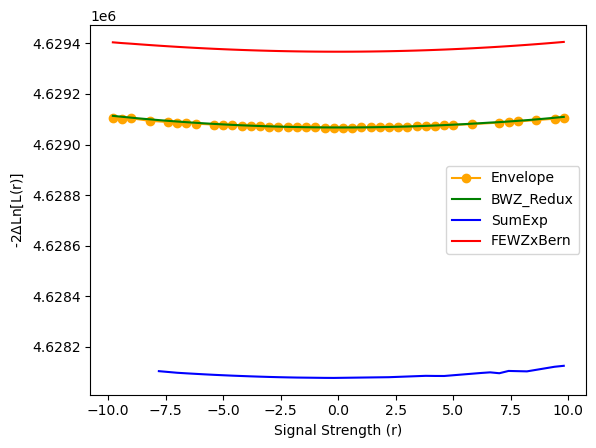

In [45]:
load_path_dict = {
    "Envelope": "./higgsCombineEnvelope_V2.MultiDimFit.mH125.root",
    "BWZ_Redux": "./higgsCombinefixed_pdf_0_V2.MultiDimFit.mH125.root",
    "SumExp": "./higgsCombinefixed_pdf_1_V2.MultiDimFit.mH125.root",
    "FEWZxBern": "./higgsCombinefixed_pdf_2_V2.MultiDimFit.mH125.root",

}
color_map = {
    "BWZ_Redux": "Green",
    "SumExp": "Blue",
    "FEWZxBern": "Red",
    # "PowerLaw": "Red",
    # "BWZxBern": "Purple",
}
for process, load_path in load_path_dict.items():
    x_arr,y_arr = getRandNLL(load_path)
    if "Envelope" in load_path:
        plt.plot(x_arr,y_arr, color='orange', marker='o', label=process)
    else:
        plt.plot(x_arr,y_arr, color=color_map[process], label=process)
plt.legend()
# plt.xlim([0.0, 10.0])
# plt.xlim([-10.0, 0.0])
# plt.ylim([-100, 20000])
# plt.ylim([1.2e6, 1.4e6])
plt.xlabel("Signal Strength (r)")
# plt.ylabel("-2lnL(r) + c")
plt.ylabel("-2$\\Delta$Ln[L(r)]")
plt.show()

In [39]:
%%bash
combine -M Significance -d test_datacardV2.txt -m 125 -n _signif_cat0_ggh --cminDefaultMinimizerStrategy=0 -t -1 --toysFrequentist --expectSignal 1 --X-rtd FITTER_NEWER_GIVE_UP --X-rtd FITTER_BOUND --setParameters pdf_index=0 --cminRunAllDiscreteCombinations --setParameterRanges r=-10,10 --X-rtd MINIMIZER_freezeDisassociatedParams --cminDefaultMinimizerTolerance=0.01 --X-rtd MINIMIZER_MaxCalls=9999999 --X-rtd FAST_VERTICAL_MORPH --verbose 3


>>> Random number generator seed is 123456
>>> Method used is Significance
Turning on runtime-define FITTER_NEWER_GIVE_UP
Turning on runtime-define FITTER_BOUND
Turning on runtime-define MINIMIZER_freezeDisassociatedParams
Setting runtime-define MINIMIZER_MaxCalls to 9999999
Turning on runtime-define FAST_VERTICAL_MORPH


Will make a binned dataset
Observables: ['mh_ggh']
Will use category 'CMS_channel' to identify the 1 channels
Creating pdfs for individual modes (1): .   done.
Importing combined pdf model_s
Importing combined pdf model_b



RooWorkspace(w) w contents

variables
---------
(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,CMS_channel,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,lumi_13TeV_In,mh_ggh,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,pdf_index_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0)

p.d.f.s
-------
RooSimultaneousOpt::model_b[ indexCat=CMS_channel mh_ggh=pdf_binmh_ggh_bonly extraConstraints=() channelMasks=() ] = 0.00010013
  RooProdPdf::pdf_binmh_ggh_bonly[ lumi_13TeV_Pdf * pdf_binmh_ggh_bonly_nuis * pdfbins_binmh_ggh ] = 0.00010013
    SimpleGaussianConstraint::lumi_13TeV_Pdf[ x=lumi_13TeV mean=lumi_13TeV_In sigma=1 ] = 1
    RooAddPdf::pdf_binmh_ggh_bonly_nuis[ n_exp_final_binmh_ggh_proc_CorePdf_subCat0 * shapeBkg_CorePdf_subCat0_mh_ggh ] = 0.00010013/1
      Roo

Setting variable 'MH' in workspace to the mass 125


Set Range of Parameter r To : (-10,10)
Found a parameter named shapeSig_signal_subCat0_mh_ggh__norm infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
Found a parameter named MH infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
Found a parameter named n_exp_binmh_ggh_proc_CorePdf_subCat0 infinite in ROOT versions < 6.30, going to update the ranges to take into account the new definition of infinity in ROOT v6.30
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooUniform::prior
Adding discrete pdf_index_subCat0 
Saving snapshot 'clean'
Saved snapshot 'clean'
[#1] INFO:NumericIntegration -- RooRealIntegral::init([subCat0_BWZ_Redux_X_subCat0_SMF]_Norm[mh_ggh]_denominator_Int[mh_ggh]) using numeric integrator RooIntegrator1D to calculate Int(mh_ggh)
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =        76.8445766 NCalls =     33
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 76.8445766
  Internal parameters:	[    -0.3097551648    -0.1839904947     0.1039896522     0.3090666834     0.1636279607   -0.01642676537                0    -0.3398369095]	
  Internal gradient  :	[      10.45442812      877.0095344       1789.26114     -99.81234949      4994.832428     -5827.084911    -0.3657763406      464.1688707]	
  Internal covariance matrix:
[[   4.538942e-05              0              0              0              0              0              0              0]
 [              0  4.1004674e-07              0              0              0              0              0              0]
 [              0              0  7.6302977e-07              0              0              0     

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -67.2310386211285049
Edm   = 5.33530458834264314e-06
Nfcn  = 3099
BWZ_Redux_a_coeff	  = 0.0106575	 +/-  0.0115603	(limited)
BWZ_Redux_b_coeff	  = -7.34635e-05	 +/-  3.9133e-05	(limited)
BWZ_Redux_c_coeff	  = 3.18193	 +/-  0.289468	(limited)
a0_subCat0	  = 0.999562	 +/-  0.0323605	(limited)
a1_subCat0	  = 0.208278	 +/-  0.0169326	(limited)
a3_subCat0	  = 0.0216498	 +/-  0.00609943	(limited)
lumi_13TeV	  = -0.0125768	 +/-  0.976407	(limited)
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 658250	 +/-  809.508	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
[#1] INFO:NumericIntegration -- RooRealIntegral::init([subCat0_sumExp_X_subCat0_SMF_sumExp]_Norm[mh_ggh]_denominator_Int[mh_ggh]) using numeric integrator RooIntegrator1D to calculate Int(mh_ggh)
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strate

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =       73.98824031 NCalls =     33
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 73.98824031
  Internal parameters:	[     0.2945837078     0.9694850244      1.552004856     0.3090666834     0.1636279607   -0.01642676537                0    -0.3398369095]	
  Internal gradient  :	[     -11361.54861     0.1853791937      -87.1538041       -695.92675      5847.526006     -4444.829534    -0.3870728413       464.579832]	
  Internal covariance matrix:
[[  1.2498329e-08              0              0              0              0              0              0              0]
 [              0     0.60906407              0              0              0              0              0              0]
 [              0              0  0.00018340736              0              0              0    

FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (1.00883) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=0.998703	RooSumTwoExpPdf_a2_coeff=-0.75296	RooSumTwoExpPdf_f_coeff=0.535782	a0_subCat0=0.426058	a1_subCat0=0.116705	a3_subCat0=-0.999228	lumi_13TeV=2.37747	shapeBkg_CorePdf_subCat0_mh_ggh__norm=145510
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 0.011560

Info in <Minuit2>: VariableMetricBuilder    9 - FCN =      -57.11429534 Edm =        56073.5335 NCalls =    229


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (4.89332e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.455276	RooSumTwoExpPdf_a2_coeff=-0.765138	RooSumTwoExpPdf_f_coeff=0.00247005	a0_subCat0=0.997533	a1_subCat0=0.481468	a3_subCat0=-0.510233	lumi_13TeV=2.383	shapeBkg_CorePdf_subCat0_mh_ggh__norm=42016.5
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 0

Info in <Minuit2>: VariableMetricBuilder   10 - FCN =      -57.11665928 Edm =       15759.76225 NCalls =    251


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (4.89332e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.544242	RooSumTwoExpPdf_a2_coeff=-0.784018	RooSumTwoExpPdf_f_coeff=0.172826	a0_subCat0=0.883321	a1_subCat0=0.505873	a3_subCat0=0.898382	lumi_13TeV=2.36333	shapeBkg_CorePdf_subCat0_mh_ggh__norm=950072
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 0.0

Warning in <Minuit2>: DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line (details in info log)
Info in <Minuit2>: DavidonErrorUpdator Explanation:
   The distance from the minimum cannot be estimated, since the minimized
   function seems not to be strictly convex in the space probed by the fit.
   That is expected if the starting parameters are e.g. close to a local maximum
   of the minimized function. If this function is expected to be fully convex
   in the probed range or Minuit is already close to the function minimum, this
   may hint to numerical or analytical issues with the minimized function.
   This was found by projecting the difference of gradients at two points, s0 and p1,
   onto the direction given by the difference of s0 and p1, where:
 * s0:  	[     0.2943017923     0.6789590518      1.566360835     0.3107012484     0.1467243102   -0.01229760301 -0.0009573932227    -0.3401363571]	 
 * p1:  	[     0.2938759929     0.6788503699      1.54387

FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (4.89332e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=-0.350377	RooSumTwoExpPdf_a2_coeff=-0.770198	RooSumTwoExpPdf_f_coeff=0.736564	a0_subCat0=0.982877	a1_subCat0=-0.311311	a3_subCat0=-0.654203	lumi_13TeV=2.37077	shapeBkg_CorePdf_subCat0_mh_ggh__norm=31891
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/- 0.

Info in <Minuit2>: VariableMetricBuilder   12 - FCN =      -58.80223401 Edm =       15288.75117 NCalls =    294
Info in <Minuit2>: VariableMetricBuilder   13 - FCN =      -58.81577508 Edm =       1085.170893 NCalls =    315
Info in <Minuit2>: VariableMetricBuilder   14 - FCN =       -58.9760487 Edm =       51.77863065 NCalls =    335
Warning in <Minuit2>: VariableMetricBuilder Matrix not pos.def, gdel = 2.29385 > 0
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 0.612836
Warning in <Minuit2>: VariableMetricBuilder gdel = -324.25
Info in <Minuit2>: VariableMetricBuilder   15 - FCN =      -59.20149369 Edm =       63.59667214 NCalls =    354


FASTEXIT from pdf_binmh_ggh_obsOnly
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (4.89332e+06) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	RooSumTwoExpPdf_a1_coeff=0.745127	RooSumTwoExpPdf_a2_coeff=-0.669443	RooSumTwoExpPdf_f_coeff=0.00679914	a0_subCat0=-0.105032	a1_subCat0=-0.756878	a3_subCat0=0.777441	lumi_13TeV=2.35461	shapeBkg_CorePdf_subCat0_mh_ggh__norm=4802.24
RooAbsReal::mh_ggh[ params=(BWZ_Redux_a_coeff,BWZ_Redux_b_coeff,BWZ_Redux_c_coeff,FEWZxBern_c1,FEWZxBern_c2,FEWZxBern_c3,MH_subCat0,RooSumTwoExpPdf_a1_coeff,RooSumTwoExpPdf_a2_coeff,RooSumTwoExpPdf_f_coeff,a0_subCat0,a1_subCat0,a3_subCat0,alpha1_subCat0,alpha2_subCat0,lumi_13TeV,n1_subCat0,n2_subCat0,n_exp_binmh_ggh_proc_CorePdf_subCat0,r,shapeBkg_CorePdf_subCat0_mh_ggh__norm,shapeSig_signal_subCat0_mh_ggh__norm,sigma_subCat0) catParams=(pdf_index_subCat0) ]
     Number of events is negative or error @ params=(BWZ_Redux_a_coeff = -0.00262064 +/-

Info in <Minuit2>: VariableMetricBuilder   16 - FCN =      -60.03295606 Edm =       2.824097861 NCalls =    372
Info in <Minuit2>: VariableMetricBuilder   17 - FCN =      -60.05958686 Edm =       1.429183863 NCalls =    391
Info in <Minuit2>: VariableMetricBuilder   18 - FCN =      -60.06338191 Edm =      0.2766425437 NCalls =    410
Info in <Minuit2>: VariableMetricBuilder   19 - FCN =      -60.38444314 Edm =     0.08725751851 NCalls =    429
Info in <Minuit2>: VariableMetricBuilder   20 - FCN =      -60.49514761 Edm =      0.1025097512 NCalls =    448
Info in <Minuit2>: VariableMetricBuilder   21 - FCN =      -60.59992601 Edm =      0.1397583558 NCalls =    466
Info in <Minuit2>: VariableMetricBuilder   22 - FCN =      -60.65389245 Edm =     0.04176797582 NCalls =    484
Info in <Minuit2>: VariableMetricBuilder   23 - FCN =      -60.69399893 Edm =     0.01591966295 NCalls =    503
Info in <Minuit2>: VariableMetricBuilder   24 - FCN =      -60.75603101 Edm =     0.03180494842 NCalls =

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -68.561289127208525
Edm   = 2.94367211074131913e-06
Nfcn  = 1691
RooSumTwoExpPdf_a1_coeff	  = -0.0854634	 +/-  0.0473417	(limited)
RooSumTwoExpPdf_a2_coeff	  = 0.0530093	 +/-  0.0980181	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.99021	 +/-  0.0115386	(limited)
a0_subCat0	  = 0.626111	 +/-  1.49252	(limited)
a1_subCat0	  = 0.178639	 +/-  0.223508	(limited)
a3_subCat0	  = 0.000289186	 +/-  0.0781083	(limited)
lumi_13TeV	  = -0.0137729	 +/-  0.992484	(limited)
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 658250	 +/-  800.073	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
[#1] INFO:NumericIntegration -- RooRealIntegral::init([fewz_roospline_func_X_subCat0_SMF_FEWZxBern]_Norm[mh_ggh]_denominator_Int[mh_ggh]) using numeric integrator RooIntegrator1D to calculate Int(mh_ggh)
Minuit2Minimizer: Minimize with max-calls 9999999 convergenc

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =       21.16774888 NCalls =     33
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 21.16774888
  Internal parameters:	[     0.1327441762     0.0725135992     0.0388317531     0.3090666834     0.1636279607   -0.01642676537                0    -0.3398369095]	
  Internal gradient  :	[     -257.4304451     -3298.441519     -5317.111817     -874.9284866     -621.7721285      3537.542316     0.1343305228       454.951186]	
  Internal covariance matrix:
[[  4.0685919e-06              0              0              0              0              0              0              0]
 [              0  8.3494047e-07              0              0              0              0              0              0]
 [              0              0  1.5496028e-07              0              0              0    

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -22.9446530185567426
Edm   = 8.25333305857693986e-07
Nfcn  = 221
FEWZxBern_c1	  = 0.250152	 +/-  0.0321233	(limited)
FEWZxBern_c2	  = 0.13052	 +/-  0.00374629	(limited)
FEWZxBern_c3	  = 0.0792081	 +/-  0.00117005	(limited)
a0_subCat0	  = 0.309964	 +/-  0.00293016	(limited)
a1_subCat0	  = 0.142576	 +/-  0.0203476	(limited)
a3_subCat0	  = -0.0378098	 +/-  0.00661437	(limited)
lumi_13TeV	  = -0.0131837	 +/-  0.996157	(limited)
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 658251	 +/-  815.008	(limited)
Minimization finished with status=0
Minimization success! status=0
Minimization configured with Type=Minuit2, Algo=Migrad, strategy=0, tolerance=0.01
Minuit2Minimizer: Minimize with max-calls 9999999 convergence for edm < 0.01 strategy 0
Minuit2Minimizer::Minuit  - Changing default options
             StorageLevel :               0


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =   4.222681764e-06 NCalls =     31
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 0
  Edm           : 4.222681764e-06
  Internal parameters:	[     0.2800021709     0.3775808954      1.372584077     0.6765558901     0.1796028482  0.0002891855793  -0.001967560497    -0.3401833858]	
  Internal gradient  :	[      29.88323582    0.09615877113 -7.516308482e-05    -0.3457837639     0.7169492665    -0.2027546845   0.002590315653     -0.798017192]	
  Internal covariance matrix:
[[  1.4057714e-08              0              0              0              0              0              0              0]
 [              0  1.3063002e-05              0              0              0              0              0              0]
 [              0              0  3.0555223e-05              0              0              0

Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -6.392636607249042e-08
Edm   = 1.4386318844793403e-06
Nfcn  = 56
RooSumTwoExpPdf_a1_coeff	  = -0.0854634	 +/-  4.68682e-05	(limited)
RooSumTwoExpPdf_a2_coeff	  = 0.0530091	 +/-  0.00355459	(limited)
RooSumTwoExpPdf_f_coeff	  = 0.99021	 +/-  0.000383124	(limited)
a0_subCat0	  = 0.626111	 +/-  0.00159015	(limited)
a1_subCat0	  = 0.178639	 +/-  0.00133486	(limited)
a3_subCat0	  = 0.00028924	 +/-  0.00125186	(limited)
lumi_13TeV	  = -0.0138355	 +/-  0.99731	(limited)
shapeBkg_CorePdf_subCat0_mh_ggh__norm	  = 658250	 +/-  814.819	(limited)
Minimization finished with status=0
Minimization success! status=0
Nuisance parameters after fit for asimov dataset: 
  1) RooRealVar:: lumi_13TeV = -0.0138355 +/- 0.99731
Parameters after fit for asimov dataset
BWZ_Redux_a_coeff = -0.00262064 
BWZ_Redux_b_coeff = -0.000182954 
BWZ_Redux_c_coeff = 0.519012 
FEWZxBern_c1 = 0.264709 
FEWZxBern_c2 = 0.1449 
FEWZxBern_c3 = 0.077644 
MH_subCat0 = 125 (const